In [9]:
# Functions for Substring Operations: Adjusting Comment Character Length to
# 80 Characters

standard_comment_length <- function(cmt) {
    cmt <- str_trim(cmt)
    trail_under_score <-  "----------------------------------------------------------------------"
    full_comment <- paste("# ", cmt, trail_under_score)
    standardized_cmt <- str_sub(full_comment, 1, 80)
    return(standardized_cmt)
}

standard_comment_length('View the structure of the dataset')


[1] "#  View the structure of the dataset -------------------------------------------"

In [24]:
# FITE7410 Financial Fraud Analytics First Semester, 2025-2026 -----------------
# Assignnment 1 Exploratory Data Analysis (EDA)
# Student: Choi Chi For 3036384024
# Due Date: 19 Oct, 2025 (Sun) 23:59
# Objective of this assignment:
# 1. Perform data cleaning and preparation
# 2. Explore and visualize the data to identify patterns and trends
# 3. Engineer new features based on domain knowledge or insights from EDA
# 4. Prepare a report summarizing the findings from EDA

# Load necessary libraries with improved error handling ------------------
.libPaths(Sys.getenv("R_LIBS_USER"))
dir.create(Sys.getenv("R_LIBS_USER"), recursive = TRUE, showWarnings = FALSE)

# Install essential packages individually to avoid tidyverse dependencies
essential_packages <- c("dplyr", "tidyr", "ggplot2", "corrplot", "stringr")
install.packages("farver", lib = Sys.getenv("R_LIBS_USER"), repos = "https://cran.r-project.org")
cat("Installing essential R packages...\n")
for (pkg in essential_packages) {
  if (!require(pkg, character.only = TRUE, quietly = TRUE)) {
    cat("Installing", pkg, "...\n")
    install.packages(pkg, lib = Sys.getenv("R_LIBS_USER"), 
                     repos = "https://cran.r-project.org", 
                     dependencies = TRUE)
  }
}

# Load libraries with suppressed startup messages
suppressPackageStartupMessages({
  library(dplyr, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(tidyr, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(ggplot2, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(corrplot, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(stringr, lib.loc = Sys.getenv("R_LIBS_USER"))
})

cat("✓ Essential packages loaded successfully!\n")
cat("Note: Using individual packages instead of full tidyverse to avoid system dependency issues.\n")

Warning message in download.file(url, destfile, method, mode = "wb", ...):
“URL 'https://cran.r-project.org/src/contrib/farver_2.1.2.tar.gz': status was 'Couldn't connect to server'”


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  cannot open URL 'https://cran.r-project.org/src/contrib/farver_2.1.2.tar.gz'


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘farver’ failed”


Installing essential R packages...
✓ Essential packages loaded successfully!
Note: Using individual packages instead of full tidyverse to avoid system dependency issues.


In [172]:
#  Load data -------------------------------------------------------------------
tryCatch({
  data <- data.frame(read.csv("A1_data.csv"))
}, warning = function(w) {
  
  print(w)
}, error = function(e) {
  print(e)
}, finally = {
print("Data loading attempt finished.")
})

head(data)


[1] "Data loading attempt finished."


,TxnID,isFraud,TxnDT,TxnDTHour,TxnAmt,ProductCD,addr1,addr2,dist1,dist2,⋯,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DevType,DevInfo
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<lgl>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
1,2987004,0,86506,24,82.9000,TP,402,73,NA,NA,⋯,samsung browser 6.2,32,2220x1080,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,SAMSUNG SM-G892A Build/NRD90M
2,2987011,0,86555,24,27.2817,LY,NA,NA,NA,30,⋯,chrome 62.0,NA,,,FALSE,FALSE,TRUE,TRUE,desktop,
3,2987016,0,86620,24,49.7000,TP,152,73,NA,NA,⋯,chrome 62.0,24,1280x800,match_status:2,TRUE,FALSE,TRUE,TRUE,desktop,MacOS
4,2987022,0,86786,24,82.9000,TP,281,73,NA,NA,⋯,,NA,,,NA,NA,NA,NA,,
5,2987038,0,87172,24,41.4000,AD,312,73,NA,98,⋯,chrome 62.0,32,1920x1080,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,
6,2987040,0,87209,24,125.8724,LY,NA,NA,NA,NA,⋯,chrome 62.0,NA,,,FALSE,FALSE,TRUE,TRUE,desktop,Windows


In [173]:
#  View summary statistics of the dataset --------------------------------------
summary(data)

     TxnID            isFraud           TxnDT            TxnDTHour   
 Min.   :2987004   Min.   :0.0000   Min.   :   86506   Min.   :  24  
 1st Qu.:3078716   1st Qu.:0.0000   1st Qu.: 1900286   1st Qu.: 527  
 Median :3203512   Median :0.0000   Median : 5031202   Median :1397  
 Mean   :3238037   Mean   :0.1132   Mean   : 6209720   Mean   :1724  
 3rd Qu.:3393812   3rd Qu.:0.0000   3rd Qu.:10272711   3rd Qu.:2853  
 Max.   :3577534   Max.   :1.0000   Max.   :15811030   Max.   :4391  
                                                                     
     TxnAmt           ProductCD             addr1           addr2       
 Min.   :   0.3515   Length:100000      Min.   : 82.0   Min.   : 18.00  
 1st Qu.:  42.0955   Class :character   1st Qu.:186.0   1st Qu.: 73.00  
 Median :  82.9000   Mode  :character   Median :281.0   Median : 73.00  
 Mean   : 138.7709                      Mean   :278.6   Mean   : 73.01  
 3rd Qu.: 165.9000                      3rd Qu.:312.0   3rd Qu.: 73.00  
 M


     0      1 
88.682 11.318 

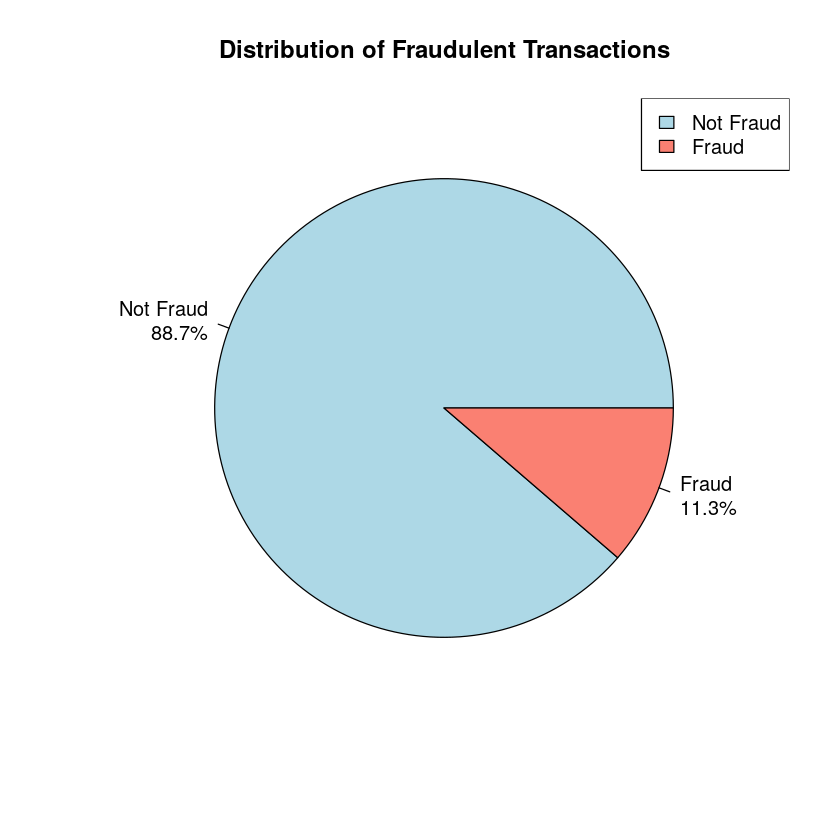

In [174]:
# view the percentage of isFraud in the dataset --------------------------------------
table(data$isFraud) / nrow(data) * 100

# visualize the distribution of isFraud using the pie chart with legend and figure inside the pie charts --------------------------------------
fraud_counts <- table(data$isFraud)
fraud_labels <- c("Not Fraud", "Fraud")
fraud_colors <- c("lightblue", "salmon")
fraud_percentages <- round(fraud_counts / sum(fraud_counts) * 100, 1)
fraud_labels <- paste(fraud_labels, "\n", fraud_percentages, "%", sep = "")
pie(fraud_counts, labels = fraud_labels, col = fraud_colors, main = "Distribution of Fraudulent Transactions")
legend("topright", legend = c("Not Fraud", "Fraud"), fill = fraud_colors)


In [155]:
# View the percentage of missing values in column with numeric value ----------------------------
numeric_cols <- sapply(data, is.numeric)
missing_percentage <- sapply(data[, numeric_cols], function(x) {
  sum(is.na(x)) / length(x) * 100
})
missing_percentage <- data.frame(missing_percentage[missing_percentage > 0])

# View the percentage of the value = "" in the column with character value ----------------------------
char_cols <- sapply(data, is.character)
empty_string_percentage <- sapply(data[, char_cols], function(x) {
  sum(x == "", na.rm = TRUE) / length(x) * 100
})
empty_string_percentage <- data.frame(empty_string_percentage[empty_string_percentage > 0])

# Fix: Ensure both data frames have the same column structure
missing_data_summary <- data.frame()

# Add missing values data if any exist
if(nrow(missing_percentage) > 0) {
  missing_df <- data.frame(
    Metric = "Missing Values (%)",
    Column = rownames(missing_percentage),
    Percentage = missing_percentage[,1]
  )
  missing_data_summary <- rbind(missing_data_summary, missing_df)
}

# Add empty strings data if any exist
if(nrow(empty_string_percentage) > 0) {
  empty_df <- data.frame(
    Metric = "Empty Strings (%)",
    Column = rownames(empty_string_percentage),
    Percentage = empty_string_percentage[,1]
  )
  missing_data_summary <- rbind(missing_data_summary, empty_df)
}

# Set proper row names
rownames(missing_data_summary) <- NULL
print(missing_data_summary)


               Metric        Column Percentage
1  Missing Values (%)         addr1     42.881
2  Missing Values (%)         addr2     42.881
3  Missing Values (%)         dist2     73.694
4  Missing Values (%)         card2      0.688
5  Missing Values (%)         card3      0.115
6  Missing Values (%)         card5      0.660
7  Missing Values (%)            D1      0.155
8  Missing Values (%)            D2     78.733
9  Missing Values (%)            D3     79.692
10 Missing Values (%)            D4     54.271
11 Missing Values (%)            D5     76.124
12 Missing Values (%)            D6     52.588
13 Missing Values (%)            D7     74.148
14 Missing Values (%)            D8     47.606
15 Missing Values (%)            D9     47.606
16 Missing Values (%)           D10     51.253
17 Missing Values (%)           D12     58.199
18 Missing Values (%)           D13     56.376
19 Missing Values (%)           D14     56.054
20 Missing Values (%)           D15     51.915
21 Missing Va

In [156]:
# Select the column with the percentage of missing values is less than 50% ----------------------------
cols_to_keep <- setdiff(names(data), missing_data_summary$Column[missing_data_summary$Percentage > 50])
data <- data.frame(data[, cols_to_keep])

# get the column names of data after removing columns with more than 50% missing values
colnames(data)


[1] "TxnID"         "isFraud"       "TxnDT"         "TxnDTHour"    
 [5] "TxnAmt"        "ProductCD"     "addr1"         "addr2"        
 [9] "dist1"         "card1"         "card2"         "card3"        
[13] "card4"         "card5"         "card6"         "P_emaildomain"
[17] "R_emaildomain" "C1"            "C2"            "C3"           
[21] "C4"            "C5"            "C6"            "C7"           
[25] "C8"            "C9"            "C10"           "C11"          
[29] "C12"           "C13"           "C14"           "D1"           
[33] "D8"            "D9"            "D11"           "M1"           
[37] "M2"            "M3"            "M5"            "M6"           
[41] "M7"            "M8"            "M9"            "V310"         
[45] "V311"          "V312"          "V313"          "V314"         
[49] "id_01"         "id_02"         "id_05"         "id_06"        
[53] "id_09"         "id_10"         "id_11"         "id_12"        
[57] "id_13"         "id_14"         "id_15"         "id_16"        
[61] "id_17"         "id_19"         "id_20"         "id_28"        
[65] "id_29"         "id_30"         "id_31"         "id_32"        
[69] "id_34"         "id_35"         "id_36"         "id_37"        
[73] "id_38"         "DevType"       "DevInfo"

In [157]:
# view the unique values in each column ----------------------------------------------
unique_values <- sapply(data, function(x) length(unique(x)))
unique_values <- data.frame(Variable = names(unique_values), Unique_Values = unique_values)
print(unique_values)

                   Variable Unique_Values
TxnID                 TxnID        100000
isFraud             isFraud             2
TxnDT                 TxnDT         99292
TxnDTHour         TxnDTHour          4193
TxnAmt               TxnAmt          6803
ProductCD         ProductCD             4
addr1                 addr1           221
addr2                 addr2            68
dist1                 dist1             1
card1                 card1          7337
card2                 card2           473
card3                 card3            96
card4                 card4             5
card5                 card5           100
card6                 card6             4
P_emaildomain P_emaildomain            10
R_emaildomain R_emaildomain            10
C1                       C1          1291
C2                       C2          1060
C3                       C3            18
C4                       C4           960
C5                       C5             1
C6                       C6       

In [158]:
# transform the data in columns with character value == "" to "unknown" ----------------------------
data[data == ""] <- "Empty Value"

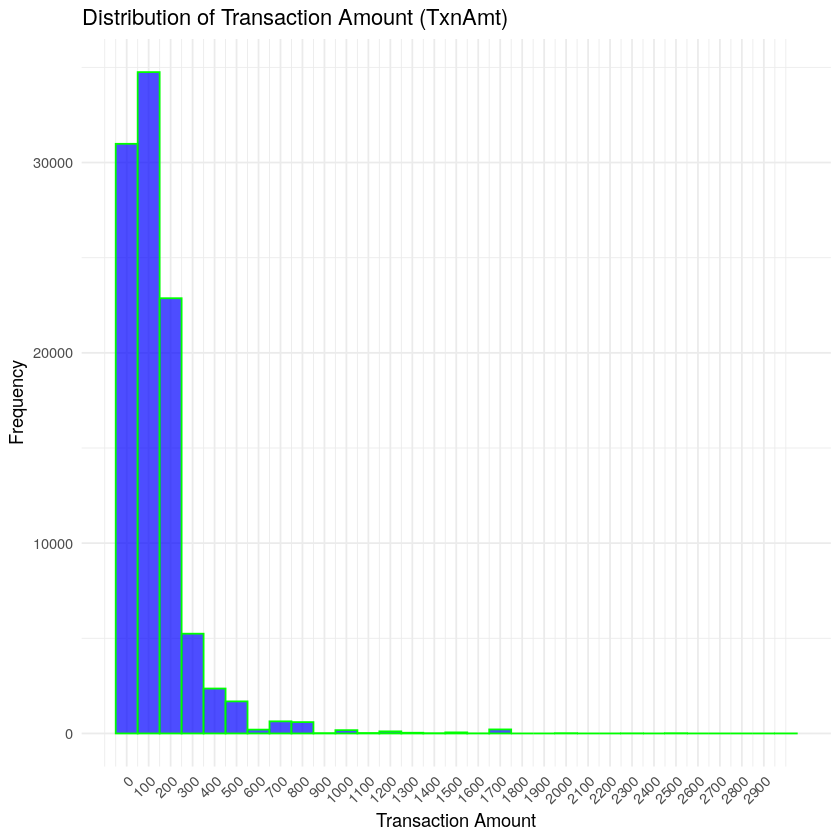

In [159]:
# view the distribution of TxnAmt ------------------------------------------------
ggplot(data, aes(x = TxnAmt)) +
  geom_histogram(binwidth = 100, fill = "blue", color = "green", alpha = 0.7) +
  labs(title = "Distribution of Transaction Amount (TxnAmt)", x = "Transaction Amount", y = "Frequency") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$TxnAmt, na.rm = TRUE), by = 100)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

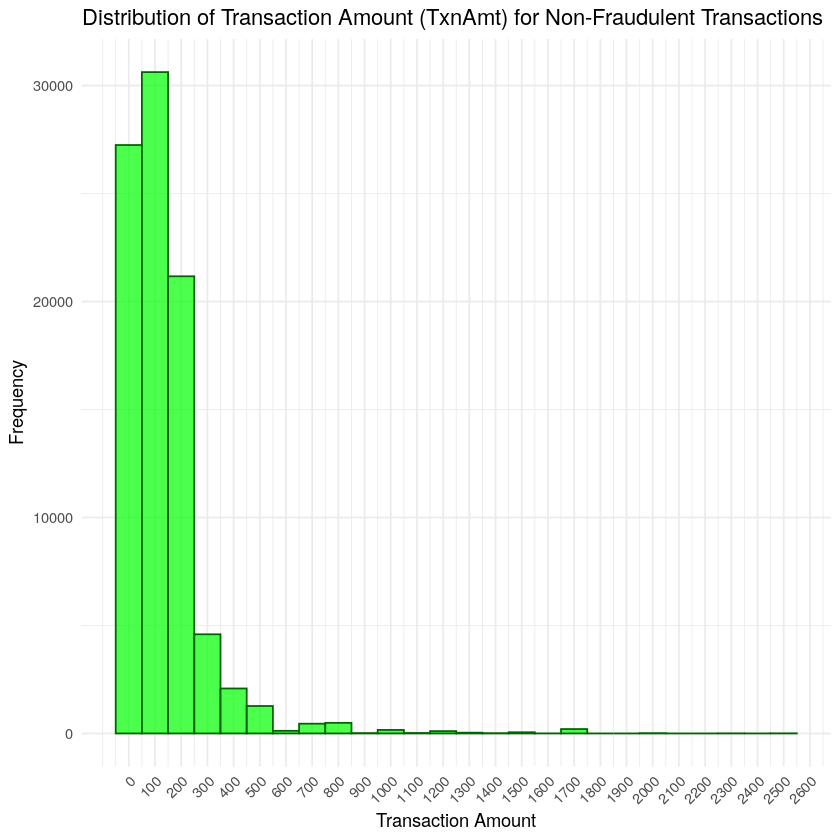

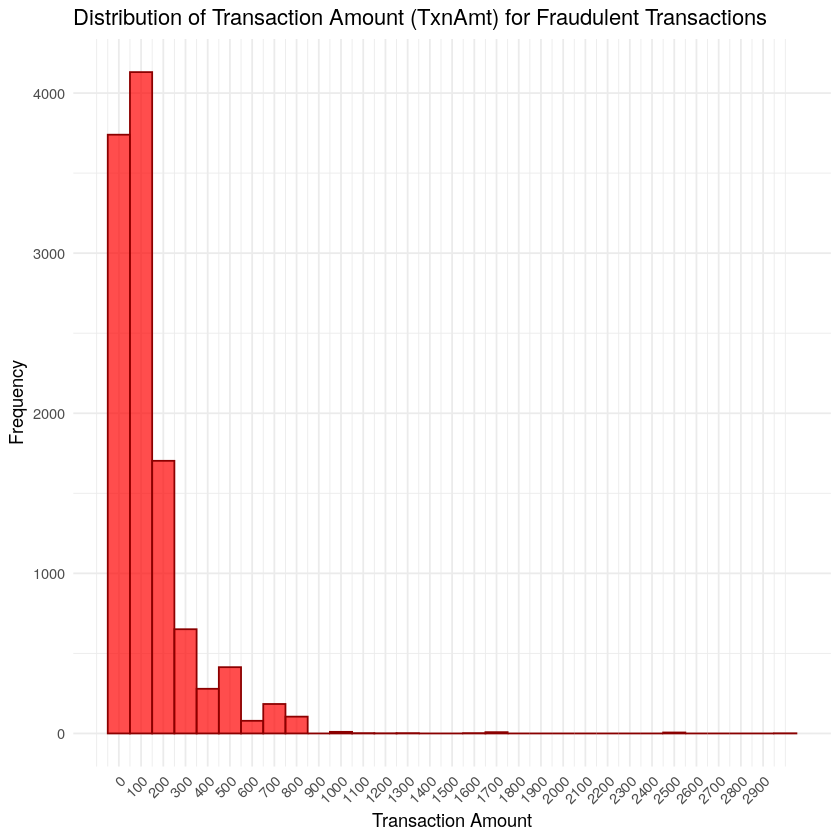

In [160]:
# view the distribution of TxnAmt group by isFraud == 0 and x tick size = 100 and font direction is diagonal--------------------------------------------------
ggplot(data %>% filter(isFraud == 0), aes(x = TxnAmt)) +
  geom_histogram(binwidth = 100, fill="green", color = "dark green", alpha = 0.7) +
  labs(title = "Distribution of Transaction Amount (TxnAmt) for Non-Fraudulent Transactions", x = "Transaction Amount", y = "Frequency") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$TxnAmt, na.rm = TRUE), by = 100)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

  # view the distribution of TxnAmt group by isFraud == 1 and x tick size = 100 and font direction is diagonal-------------------------------------------------
ggplot(data %>% filter(isFraud == 1), aes(x = TxnAmt)) +
  geom_histogram(binwidth = 100, fill="red", color = "dark red", alpha = 0.7) +
  labs(title = "Distribution of Transaction Amount (TxnAmt) for Fraudulent Transactions", x = "Transaction Amount", y = "Frequency") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$TxnAmt, na.rm = TRUE), by = 100)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


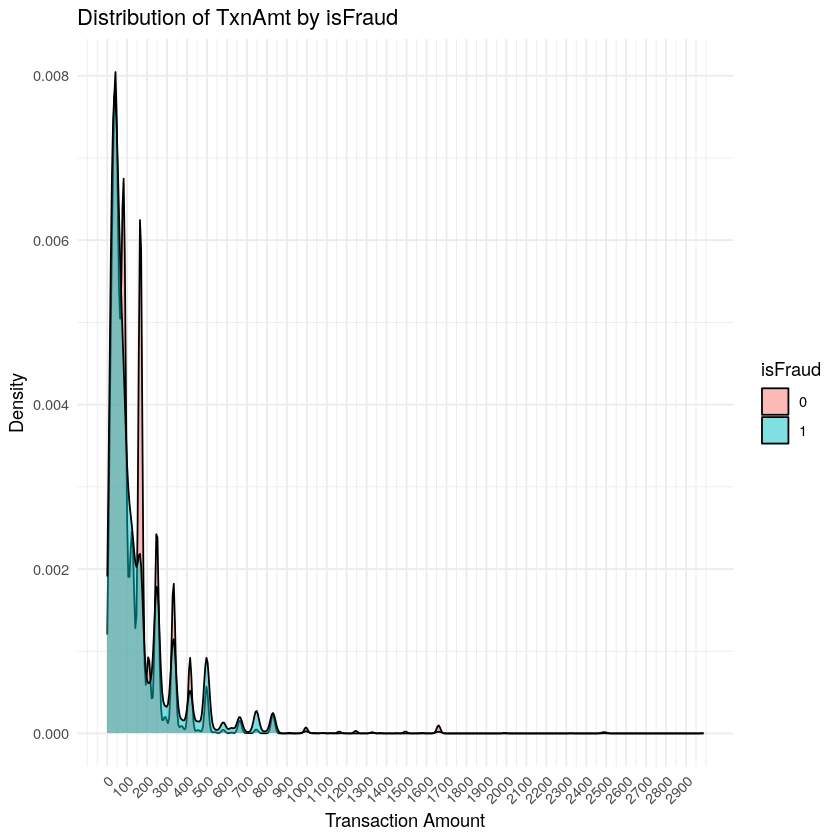

In [161]:
# view the distribution of TxnAmt group by isFraud == 0 and isFraud == 1 and bandwidth = 100 ------------------------------------------------
library(ggplot2)
ggplot(data, aes(x = TxnAmt, fill = factor(isFraud))) +
  geom_density(alpha = 0.5) +
  labs(title = "Distribution of TxnAmt by isFraud",
       x = "Transaction Amount",
       y = "Density",
       fill = "isFraud") +
  theme_minimal()  +
  scale_x_continuous(breaks = seq(0, max(data$TxnAmt, na.rm = TRUE), by = 100)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

TxnID,isFraud,TxnDT,TxnDTHour,TxnAmt,ProductCD,addr1,addr2,dist1,card1,⋯,id_36,id_37,id_38,DevType,DevInfo,Log_TxnAmt,TransactionHour,TransactionDay,TransactionMonth,TransactionWeekday
<int>,<int>,<dttm>,<int>,<dbl>,<chr>,<int>,<int>,<lgl>,<int>,⋯,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2987004,0,1970-01-02 00:01:46,24,82.90000,TP,402,73,NA,4497,⋯,FALSE,TRUE,TRUE,mobile,SAMSUNG SM-G892A Build/NRD90M,4.429626,0,2,1,5
2987011,0,1970-01-02 00:02:35,24,27.28170,LY,NA,NA,NA,4461,⋯,FALSE,TRUE,TRUE,desktop,Empty Value,3.342215,0,2,1,5
2987016,0,1970-01-02 00:03:40,24,49.70000,TP,152,73,NA,1790,⋯,FALSE,TRUE,TRUE,desktop,MacOS,3.925926,0,2,1,5
2987022,0,1970-01-02 00:06:26,24,82.90000,TP,281,73,NA,1724,⋯,NA,NA,NA,Empty Value,Empty Value,4.429626,0,2,1,5
2987038,0,1970-01-02 00:12:52,24,41.40000,AD,312,73,NA,5463,⋯,FALSE,TRUE,TRUE,mobile,Empty Value,3.747148,0,2,1,5
2987040,0,1970-01-02 00:13:29,24,125.87242,LY,NA,NA,NA,13329,⋯,FALSE,TRUE,TRUE,desktop,Windows,4.843182,0,2,1,5
2987048,0,1970-01-02 00:15:17,24,70.10804,LY,NA,NA,NA,15885,⋯,FALSE,TRUE,TRUE,desktop,Windows,4.264200,0,2,1,5
2987057,0,1970-01-02 00:17:25,24,82.90000,TP,186,73,NA,11839,⋯,FALSE,TRUE,TRUE,mobile,SM-G930V Build/NRD90M,4.429626,0,2,1,5
2987069,0,1970-01-02 00:22:05,24,33.10000,AD,312,73,NA,12866,⋯,FALSE,TRUE,TRUE,desktop,Empty Value,3.529297,0,2,1,5


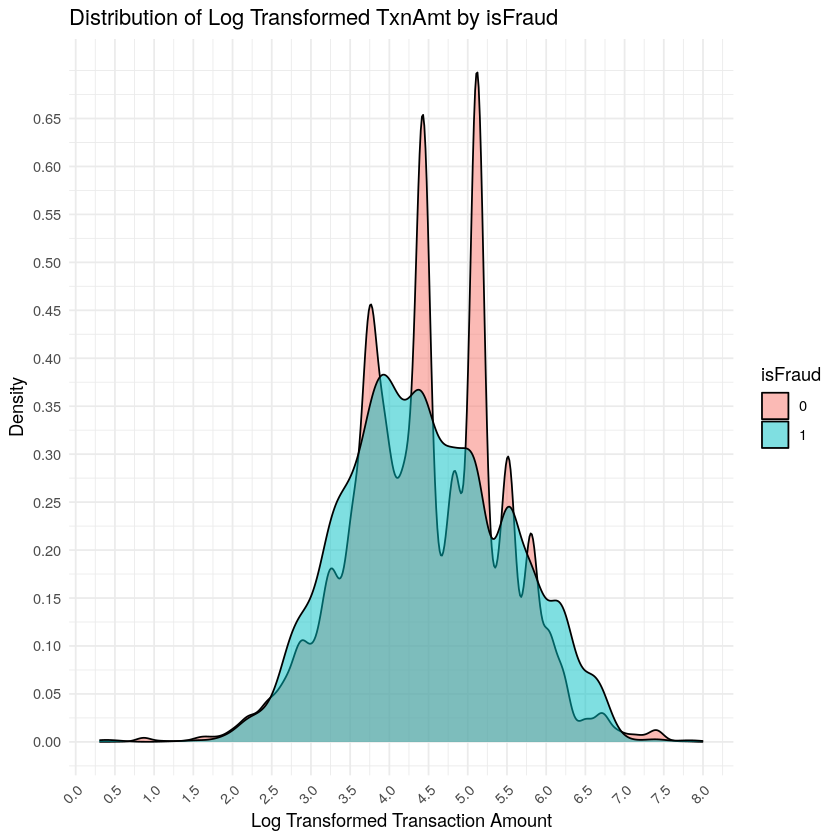

In [ ]:
# view the log transformation of TxnAmt and y tick size = 0.05 and  x tick size = 0.5 ------------------------------------------------
data <- data %>% mutate(Log_TxnAmt = log(TxnAmt + 1))  # Adding 1 to avoid log(0) 

ggplot(data, aes(x = Log_TxnAmt, fill = factor(isFraud))) +
  geom_density(alpha = 0.5) +
  labs(title = "Distribution of Log Transformed TxnAmt by isFraud",
       x = "Log Transformed Transaction Amount", 
       y = "Density",
       fill = "isFraud") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$Log_TxnAmt, na.rm = TRUE), by = 0.5)) +     
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  +
  scale_y_continuous(breaks = seq(0, max(ggplot_build(ggplot(data, aes(x = Log_TxnAmt, fill = factor(isFraud))) +
  geom_density(alpha = 0.5))$data[[1]]$density, na.rm = TRUE), by = 0.05))

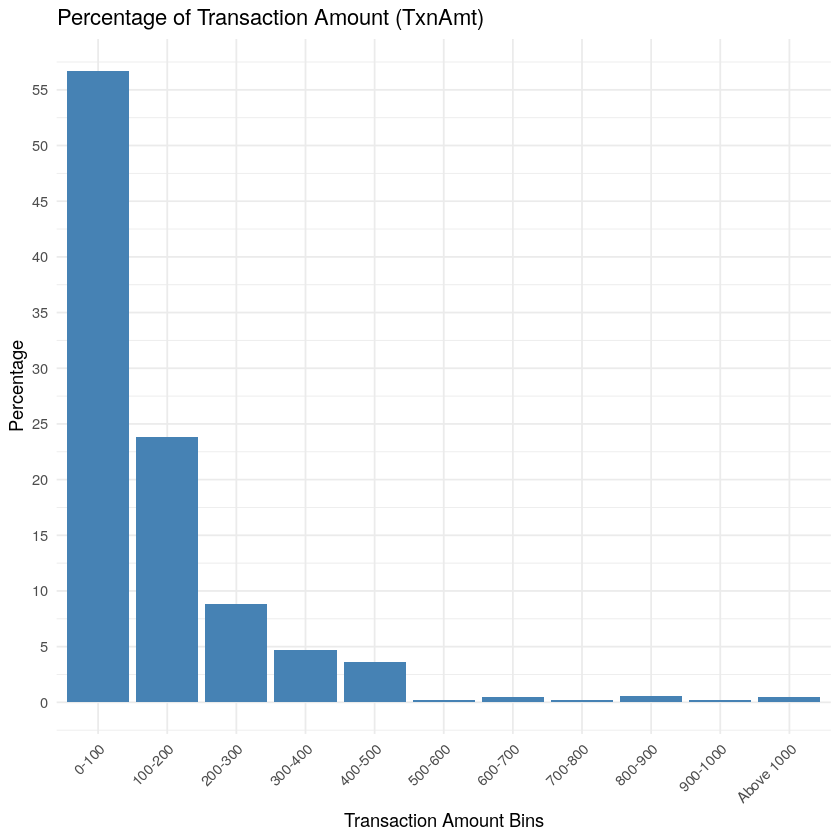

In [163]:
# view the percentage of TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000  -----------------------------------------------    
original_data <- data

data <- data %>%
  mutate(TxnAmt_Bin = case_when(
    TxnAmt <= 100 ~ "0-100",
    TxnAmt <= 200 ~ "100-200",
    TxnAmt <= 300 ~ "200-300",
    TxnAmt <= 400 ~ "300-400",
    TxnAmt <= 500 ~ "400-500",
    TxnAmt <= 600 ~ "500-600",
    TxnAmt <= 700 ~ "600-700",
    TxnAmt <= 800 ~ "700-800",
    TxnAmt <= 900 ~ "800-900",
    TxnAmt <= 1000 ~ "900-1000",
    TRUE ~ "Above 1000"
  )) %>%
  group_by(TxnAmt_Bin) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100)

  # visualize the percentage of TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 -----------------------------------------------
ggplot(data, aes(x = TxnAmt_Bin, y = Percentage)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Percentage of Transaction Amount (TxnAmt) ", x = "Transaction Amount Bins", y = "Percentage") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, max(data$Percentage, na.rm = TRUE), by = 5))

  # Restore original data for next analysis
data <- original_data

`summarise()` has grouped output by 'TxnAmt_Bin'. You can override using the
`.groups` argument.


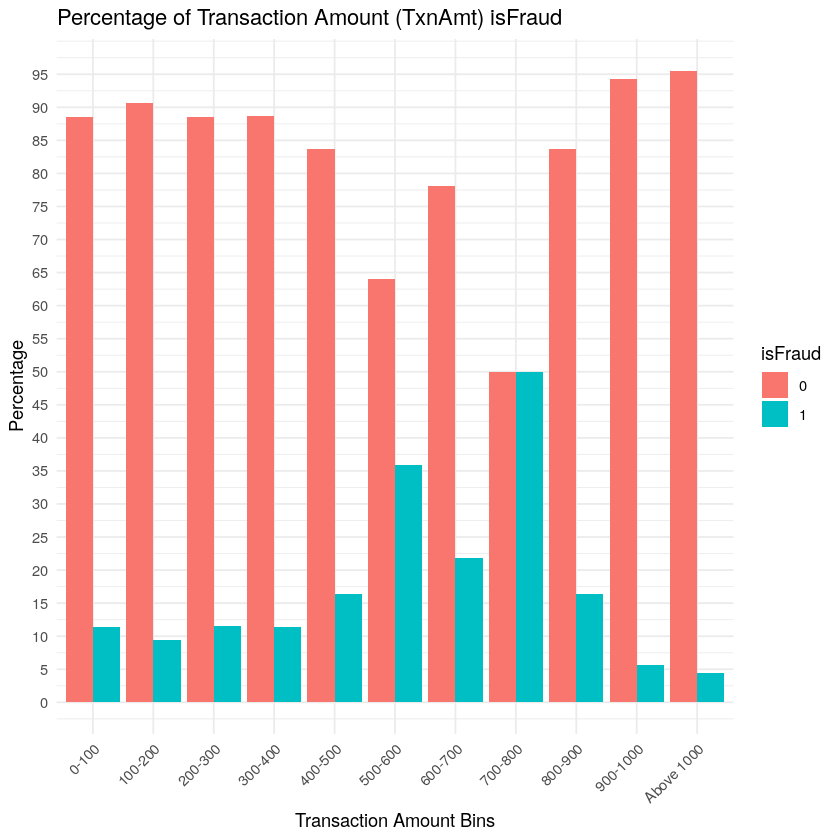

In [164]:
# view TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 group by isFraud and non-fraud ------------------------------------------------
original_data <- data
data <- data %>%
  mutate(TxnAmt_Bin = case_when(
    TxnAmt <= 100 ~ "0-100",
    TxnAmt <= 200 ~ "100-200",
    TxnAmt <= 300 ~ "200-300",
    TxnAmt <= 400 ~ "300-400",
    TxnAmt <= 500 ~ "400-500",
    TxnAmt <= 600 ~ "500-600",
    TxnAmt <= 700 ~ "600-700",
    TxnAmt <= 800 ~ "700-800",
    TxnAmt <= 900 ~ "800-900",
    TxnAmt <= 1000 ~ "900-1000",
    TRUE ~ "Above 1000"
  )) %>%
  group_by(TxnAmt_Bin, isFraud) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100)

# visualize TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 group by isFraud and non-fraud -----------------------------------------------
ggplot(data, aes(x = TxnAmt_Bin, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Percentage of Transaction Amount (TxnAmt) isFraud", 
       x = "Transaction Amount Bins", 
       y = "Percentage",
       fill = "isFraud") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, max(data$Percentage, na.rm = TRUE), by = 5))

  # Restore original data for next analysis
data <- original_data

In [165]:
# Convert TxnDT to DateTime format and extract useful features ----------------------------
data <- data %>% mutate(TxnDT = as.POSIXct(TxnDT, origin = "1970-01-01", tz = "UTC"))
data <- data %>% mutate(TransactionHour = as.numeric(format(TxnDT, "%H")),
                        TransactionDay = as.numeric(format(TxnDT, "%d")),
                        TransactionMonth = as.numeric(format(TxnDT, "%m")),
                        TransactionWeekday = as.numeric(format(TxnDT, "%u")))  # 1 = Monday, 7 = Sunday    

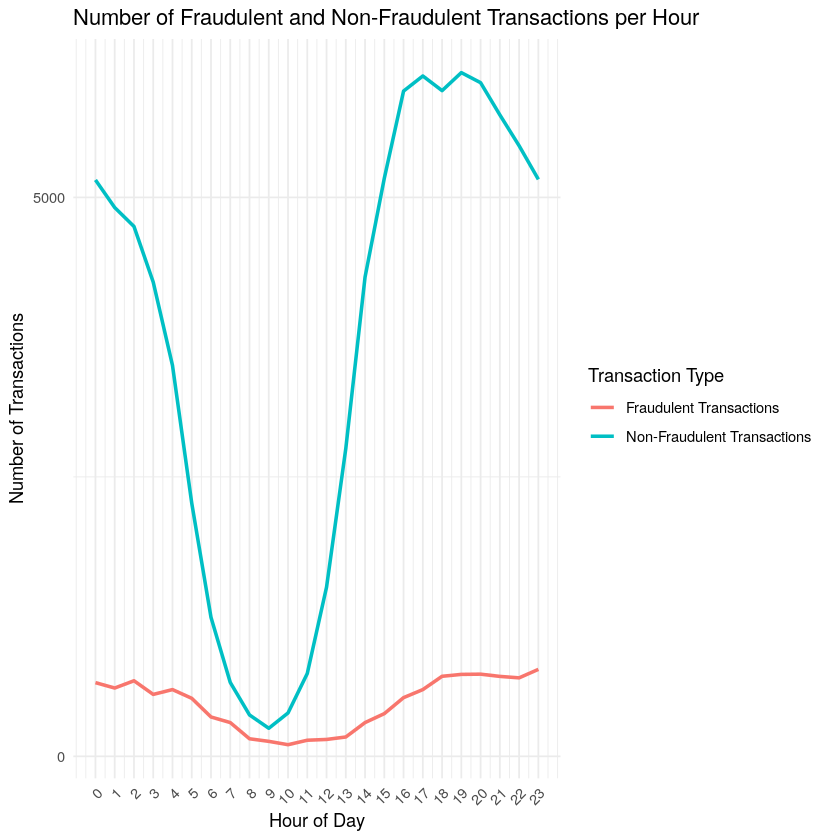

In [166]:
# count the number of transactions per hour ----------------------------------------------
transactions_per_hour <- data %>% group_by(TransactionHour) %>%
  summarise(Count = n())

# count the number of isFraud and non-fraud per hour ---------------------------------------------- 
fraud_per_hour <- data %>% group_by(TransactionHour) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud))

# visualize the number of isFraud and non-fraud per hour ----------------------------------------------
ggplot(fraud_per_hour, aes(x = TransactionHour)) +
  geom_line(aes(y = FraudCount, color = "Fraudulent Transactions"), size = 1) +
  geom_line(aes(y = NonFraudCount, color = "Non-Fraudulent Transactions"), size = 1) +
  labs(title = "Number of Fraudulent and Non-Fraudulent Transactions per Hour",
       x = "Hour of Day",
       y = "Number of Transactions",
       color = "Transaction Type") +
  theme_minimal() +
  scale_x_continuous(breaks = 0:23) +
  scale_y_continuous(breaks = seq(0, max(fraud_per_hour$NonFraudCount, na.rm = TRUE), by = 5000)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

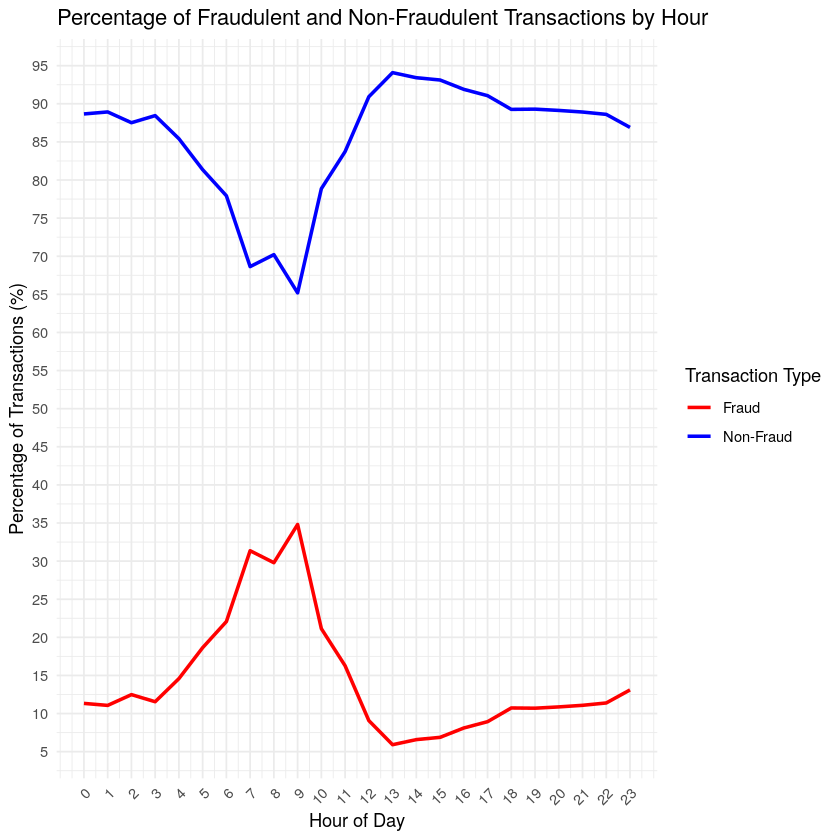

In [167]:
# view the percentage of isFraud and non-fraud by TransactionHour ------------------------------------------------
fraud_non_fraud_percentage_per_hour <- fraud_per_hour %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100)

# visualize the percentage of isFraud and non-fraud by TransactionHour ------------------------------------------------
ggplot(fraud_non_fraud_percentage_per_hour, aes(x = TransactionHour)) +
  geom_line(aes(y = FraudPercentage, color = "Fraud"), size = 1) +
  geom_line(aes(y = NonFraudPercentage, color = "Non-Fraud"), size = 1) +
  labs(title = "Percentage of Fraudulent and Non-Fraudulent Transactions by Hour",
       x = "Hour of Day",
       y = "Percentage of Transactions (%)") +
  theme_minimal() +
  scale_x_continuous(breaks = 0:23) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_color_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue"), name = "Transaction Type")

`summarise()` has grouped output by 'TransactionWeekday'. You can override
using the `.groups` argument.


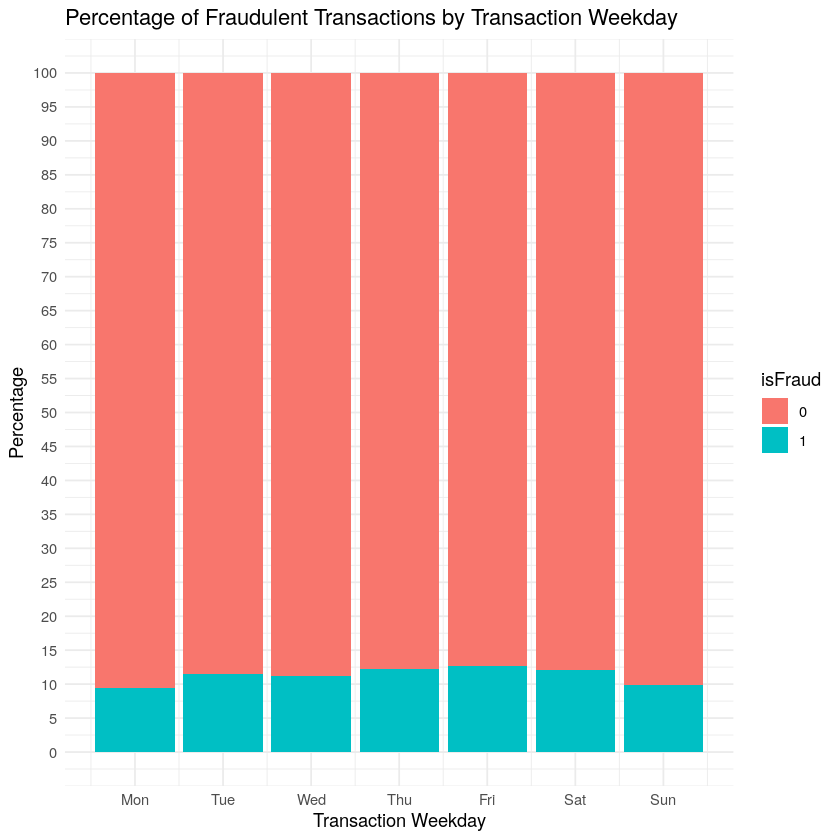

In [169]:
# view the precentage of isFraud and non-fraud by TransactionWeekday ------------------------------------------------
data %>%
  group_by(TransactionWeekday, isFraud) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100) %>%
  ggplot(aes(x = TransactionWeekday, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity") +
  labs(title = "Percentage of Fraudulent Transactions by Transaction Weekday",
       x = "Transaction Weekday", y = "Percentage", fill = "isFraud") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  scale_x_continuous(breaks = 1:7, labels = c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"))



`summarise()` has grouped output by 'TransactionMonth'. You can override using
the `.groups` argument.


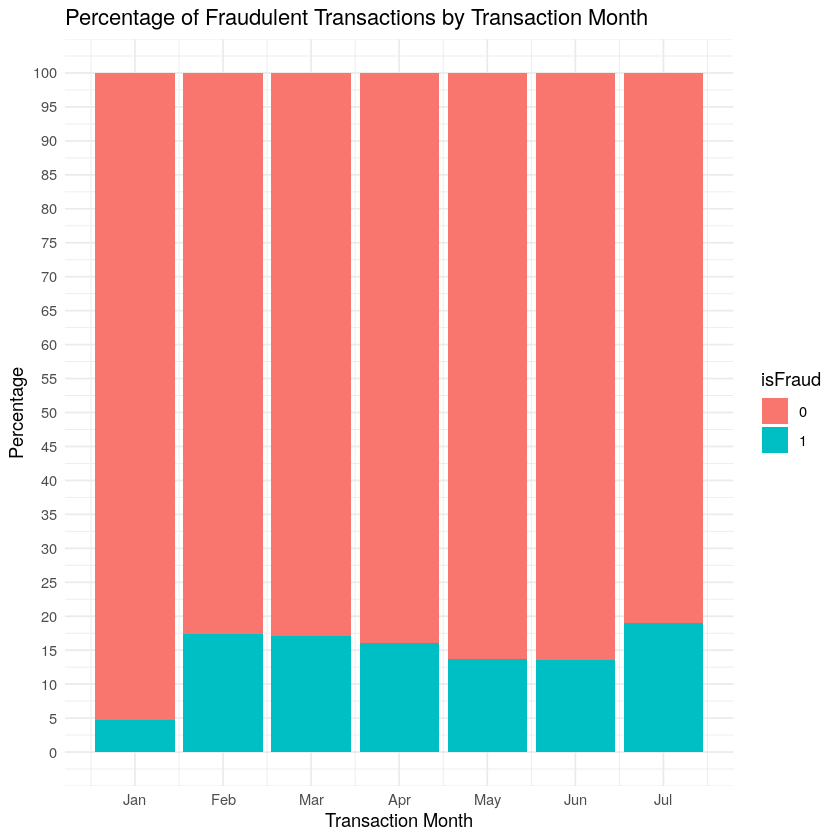

In [170]:
# view the precentage of isFraud and non-fraud by TransactionWeekday ------------------------------------------------
data %>%
  group_by(TransactionMonth, isFraud) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100) %>%
  ggplot(aes(x = TransactionMonth, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity") +
  labs(title = "Percentage of Fraudulent Transactions by Transaction Month",
       x = "Transaction Month", y = "Percentage", fill = "isFraud") +
  theme_minimal() +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  scale_x_continuous(breaks = 1:12, labels = month.abb)

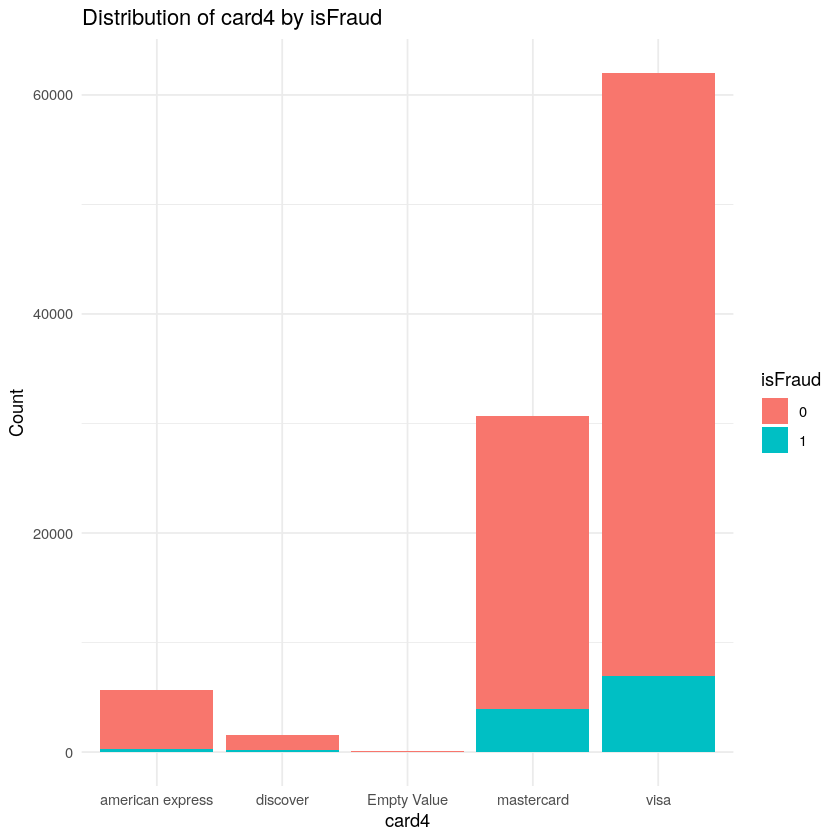

In [110]:
# view the distribution of card4 group by isFraud ------------------------------------------------
ggplot(data, aes(x = card4, fill = factor(isFraud))) +
  geom_bar() +
  labs(title = "Distribution of card4 by isFraud",
       x = "card4",
       y = "Count",
       fill = "isFraud") +
  theme_minimal()

In [111]:
# view the percentage of card4 group by isFraud ------------------------------------------------
card4_fraud_percentage <- data %>%
  group_by(card4) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(card4_fraud_percentage)


# A tibble: 5 × 5
  card4            FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>                 <int>         <int>           <dbl>              <dbl>
1 Empty Value              14           109           11.4                88.6
2 american express        239          5400            4.24               95.8
3 discover                177          1375           11.4                88.6
4 mastercard             3920         26760           12.8                87.2
5 visa                   6968         55038           11.2                88.8


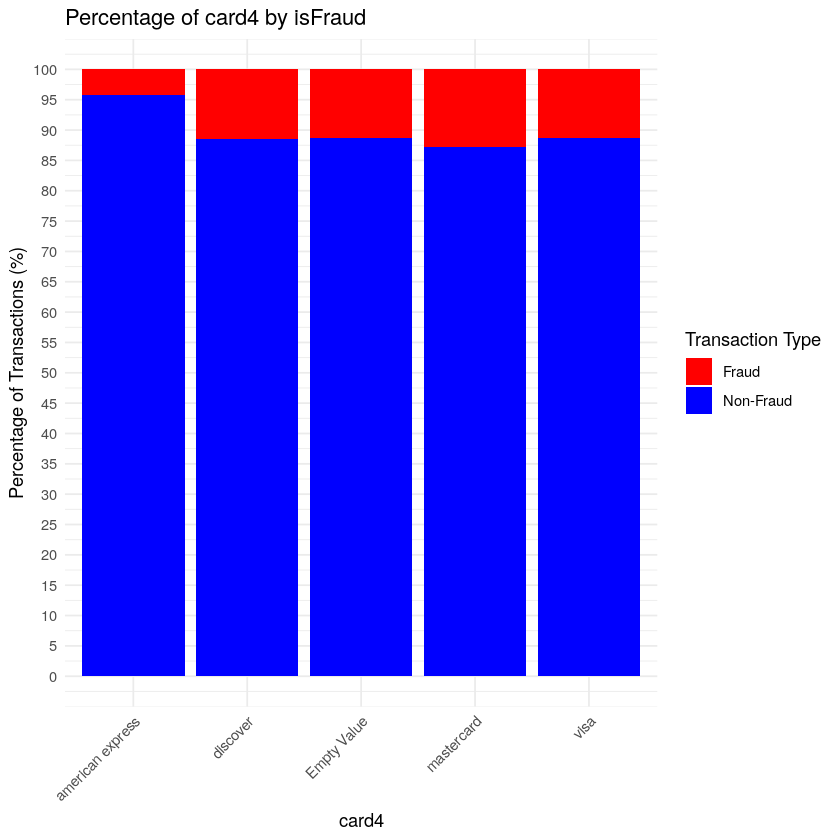

In [112]:
# visualize the percentage of card4 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
card4_plot_data <- card4_fraud_percentage %>%
  select(card4, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

# Create the plot with proper dodged bars
ggplot(card4_plot_data, aes(x = card4, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of card4 by isFraud",
       x = "card4",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")


# A tibble: 4 × 5
  card6       FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 Empty Value         12           106           10.2                89.8
2 charge card          0             9            0                 100  
3 credit            6693         45585           12.8                87.2
4 debit             4613         42982            9.69               90.3


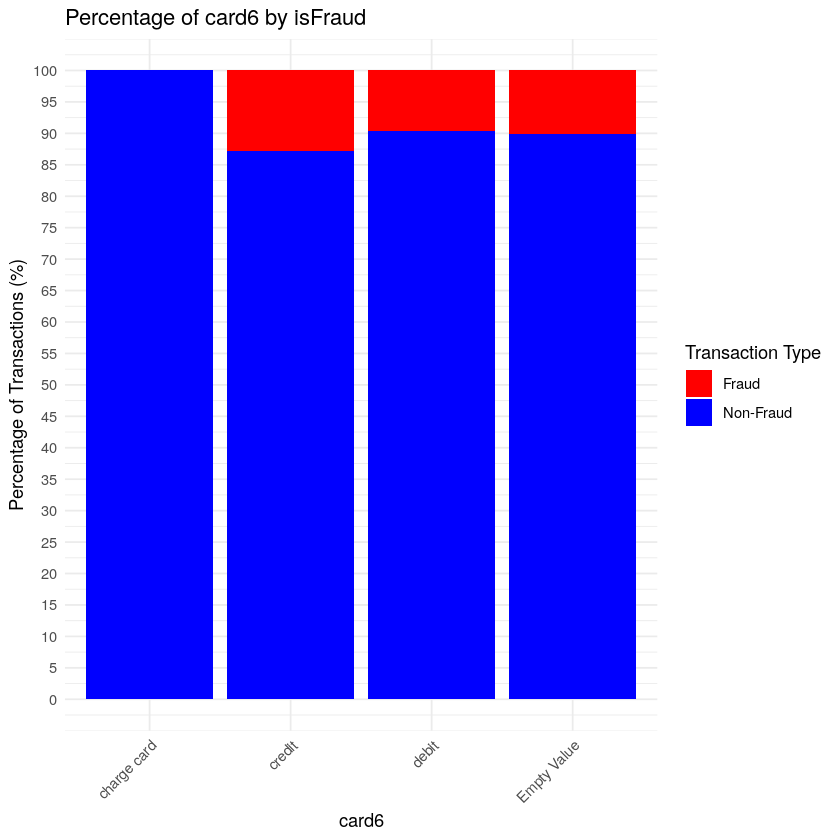

In [113]:
# view the percentage of card6 group by isFraud ------------------------------------------------
card6_fraud_percentage <- data %>%
  group_by(card6) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(card6_fraud_percentage)

# visualize the percentage of card6 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
card6_plot_data <- card6_fraud_percentage %>%
  select(card6, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  )) 

  # Create the plot with proper dodged bars
ggplot(card6_plot_data, aes(x = card6, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of card6 by isFraud",
       x = "card6",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 3 × 5
  DevType     FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 Empty Value        107          2208            4.62               95.4
2 desktop           5554         53178            9.46               90.5
3 mobile            5657         33296           14.5                85.5


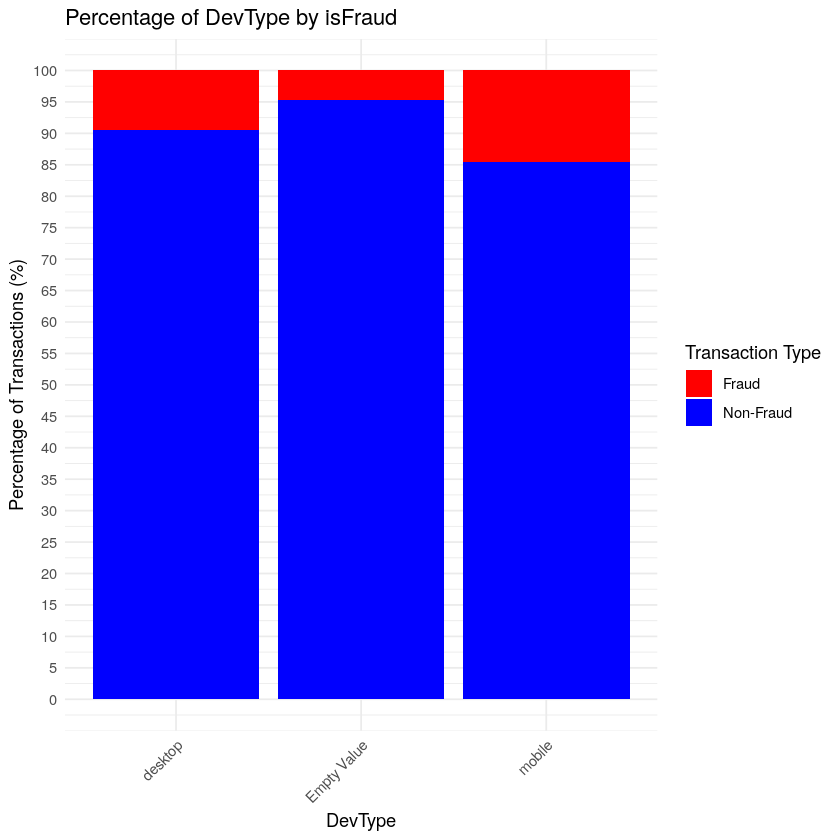

In [114]:
# view the percentage of DevType group by isFraud ------------------------------------------------
devtype_fraud_percentage <- data %>%
  group_by(DevType) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(devtype_fraud_percentage)

# visualize the percentage of DevType group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
devtype_plot_data <- devtype_fraud_percentage %>%
  select(DevType, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

# Create the plot with proper dodged bars
ggplot(devtype_plot_data, aes(x = DevType, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of DevType by isFraud",
       x = "DevType",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")
       

# A tibble: 4 × 5
  ProductCD FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>          <int>         <int>           <dbl>              <dbl>
1 AD               684          7255            8.62               91.4
2 LY              7640         36492           17.3                82.7
3 TP              1571         20835            7.01               93.0
4 WF              1423         24100            5.58               94.4


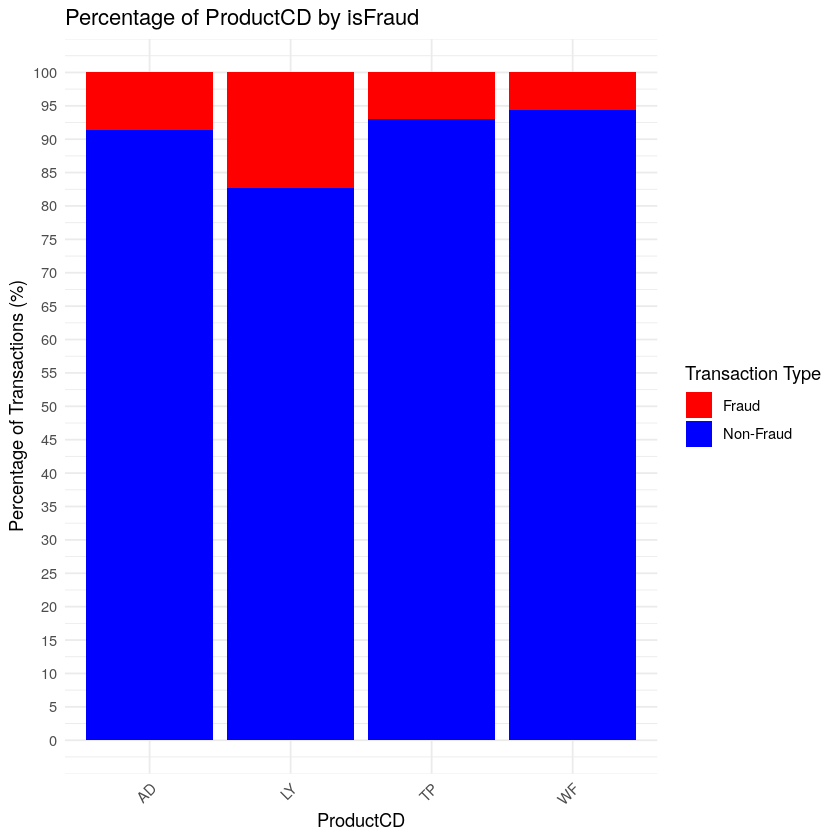

In [115]:
# view the percentage of ProductCD group by isFraud ------------------------------------------------
productcd_fraud_percentage <- data %>%
  group_by(ProductCD) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(productcd_fraud_percentage)   

# visualize the percentage of ProductCD group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
productcd_plot_data <- productcd_fraud_percentage %>%
  select(ProductCD, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(productcd_plot_data, aes(x = ProductCD, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of ProductCD by isFraud",
       x = "ProductCD",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")   

# A tibble: 10 × 5
   P_emaildomain FraudCount NonFraudCount FraudPercentage NonFraudPercentage
   <chr>              <int>         <int>           <dbl>              <dbl>
 1 AOL                   83          2815           2.86                97.1
 2 AT&T                   4           977           0.408               99.6
 3 Apple                119          1230           8.82                91.2
 4 CenturyLink            0            81           0                  100  
 5 Empty Value          962          8296          10.4                 89.6
 6 Google              6265         32029          16.4                 83.6
 7 Microsoft           2612         19371          11.9                 88.1
 8 Others               748         14478           4.91                95.1
 9 Spectrum               3           194           1.52                98.5
10 Yahoo                522          9211           5.36                94.6


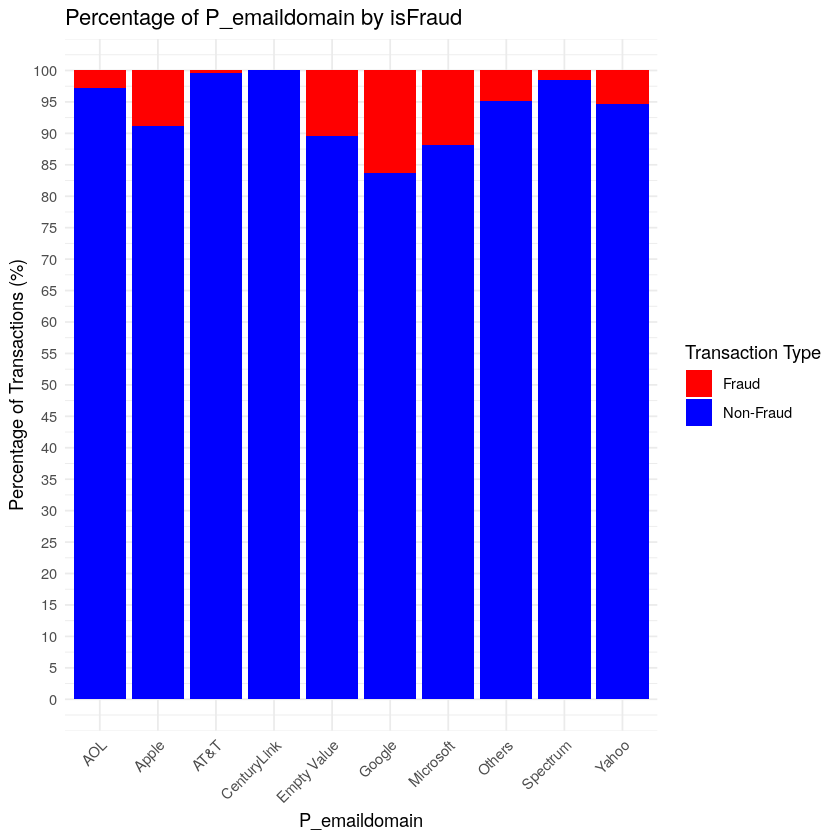

In [116]:
# view the percentage of P_emaildomain group by isFraud ------------------------------------------------
emaildomain_fraud_percentage <- data %>%
  group_by(P_emaildomain) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(emaildomain_fraud_percentage)

# visualize the percentage of P_emaildomain group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
emaildomain_plot_data <- emaildomain_fraud_percentage %>%
  select(P_emaildomain, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage),   
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud", 
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(emaildomain_plot_data, aes(x = P_emaildomain, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by =  5)) +
  labs(title = "Percentage of P_emaildomain by isFraud",
       x = "P_emaildomain",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")   

# A tibble: 10 × 5
   R_emaildomain FraudCount NonFraudCount FraudPercentage NonFraudPercentage
   <chr>              <int>         <int>           <dbl>              <dbl>
 1 AOL                  129          2407           5.09                94.9
 2 AT&T                   2           756           0.264               99.7
 3 Apple                192          1286          13.0                 87.0
 4 CenturyLink            0            69           0                  100  
 5 Empty Value          432          8418           4.88                95.1
 6 Google              6628         32416          17.0                 83.0
 7 Microsoft           2597         18823          12.1                 87.9
 8 Others               708         15420           4.39                95.6
 9 Spectrum               5           108           4.42                95.6
10 Yahoo                625          8979           6.51                93.5


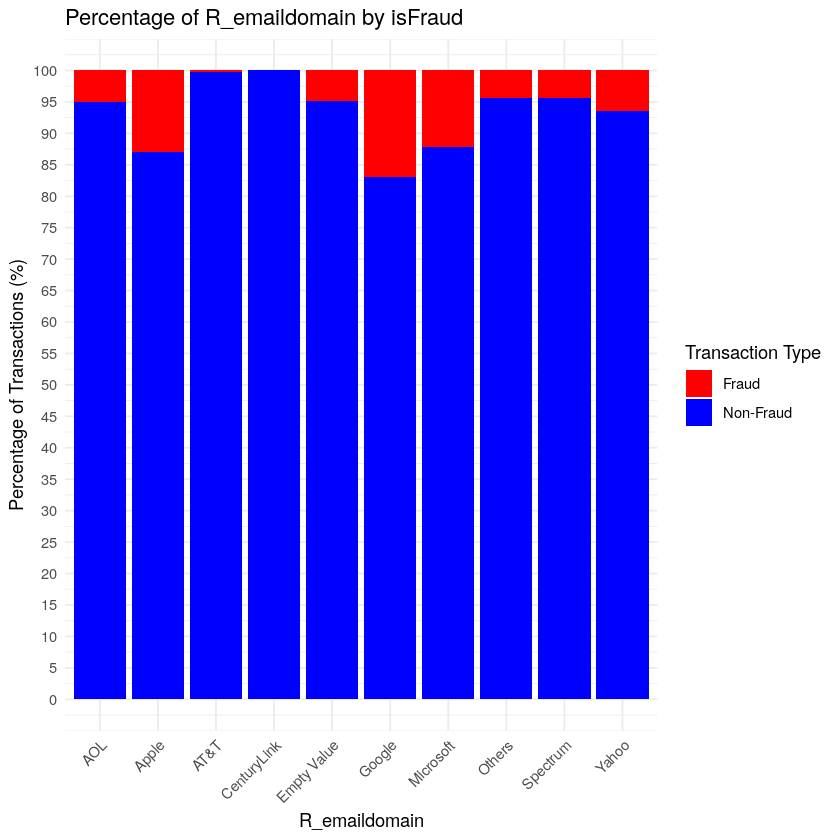

In [117]:
# view the percentage of R_emaildomain group by isFraud ------------------------------------------------
remaildomain_fraud_percentage <- data %>%
  group_by(R_emaildomain) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(remaildomain_fraud_percentage)
# visualize the percentage of R_emaildomain group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
remaildomain_plot_data <- remaildomain_fraud_percentage %>%
  select(R_emaildomain, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(remaildomain_plot_data, aes(x = R_emaildomain, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of R_emaildomain by isFraud",
       x = "R_emaildomain",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 2 × 5
  id_12    FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>         <int>         <int>           <dbl>              <dbl>
1 Found          1269         13176            8.79               91.2
2 NotFound      10049         75506           11.7                88.3


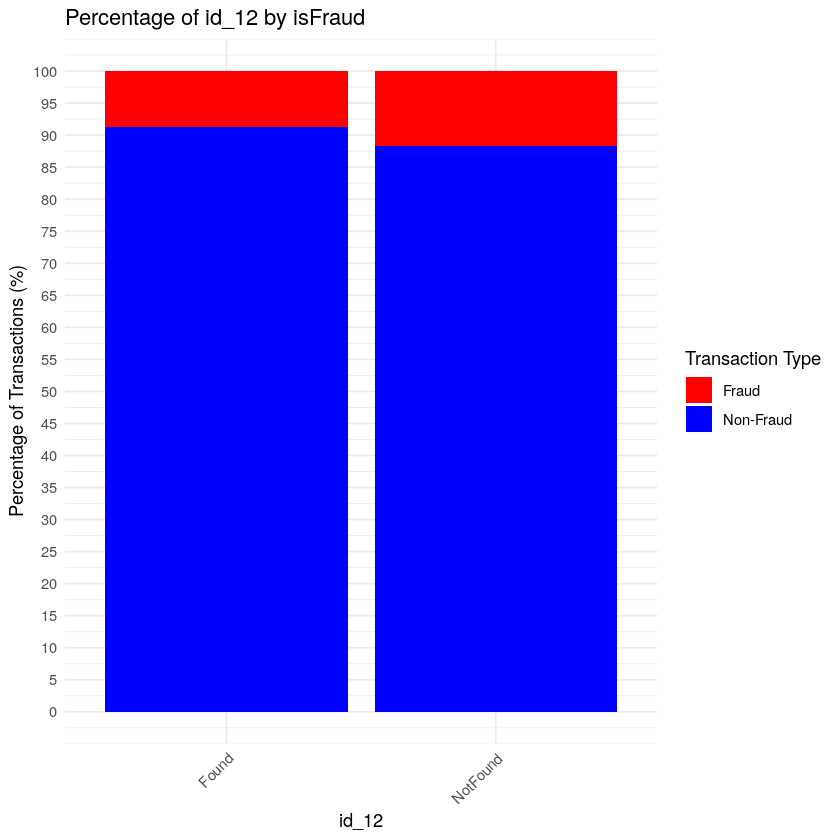

In [118]:
# view the percentage of id_12 group by isFraud ------------------------------------------------
id_12_fraud_percentage <- data %>%
  group_by(id_12) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_12_fraud_percentage)
# visualize the percentage of id_12 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
id_12_plot_data <- id_12_fraud_percentage %>%
  select(id_12, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(id_12_plot_data, aes(x = id_12, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_12 by isFraud",
       x = "id_12",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")   

# A tibble: 4 × 5
  id_15       FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 Empty Value         96          2100            4.37               95.6
2 Found             7118         40249           15.0                85.0
3 New               3034         39253            7.17               92.8
4 Unknown           1070          7080           13.1                86.9


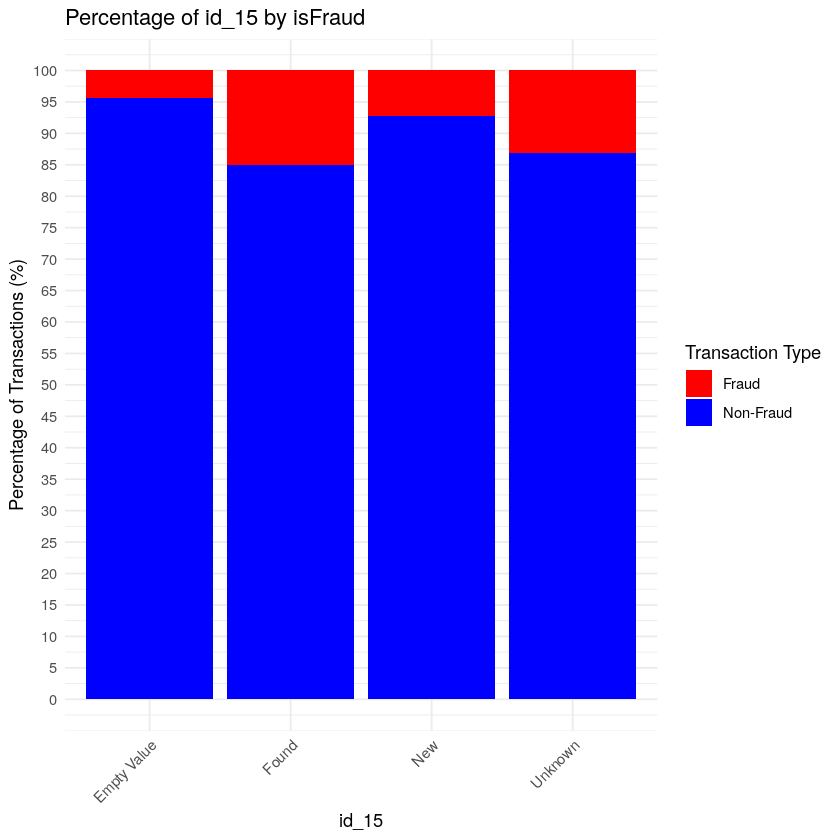

In [119]:
# view the percentage of id_15 group by isFraud ------------------------------------------------
id_15_fraud_percentage <- data %>%
  group_by(id_15) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_15_fraud_percentage)
# visualize the percentage of id_15 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
id_15_plot_data <- id_15_fraud_percentage %>% 
  select(id_15, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(id_15_plot_data, aes(x = id_15, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_15 by isFraud",
       x = "id_15",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 2 × 5
  id_15_status FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>             <int>         <int>           <dbl>              <dbl>
1 New                3034         39253            7.17               92.8
2 Not New            8284         49429           14.4                85.6


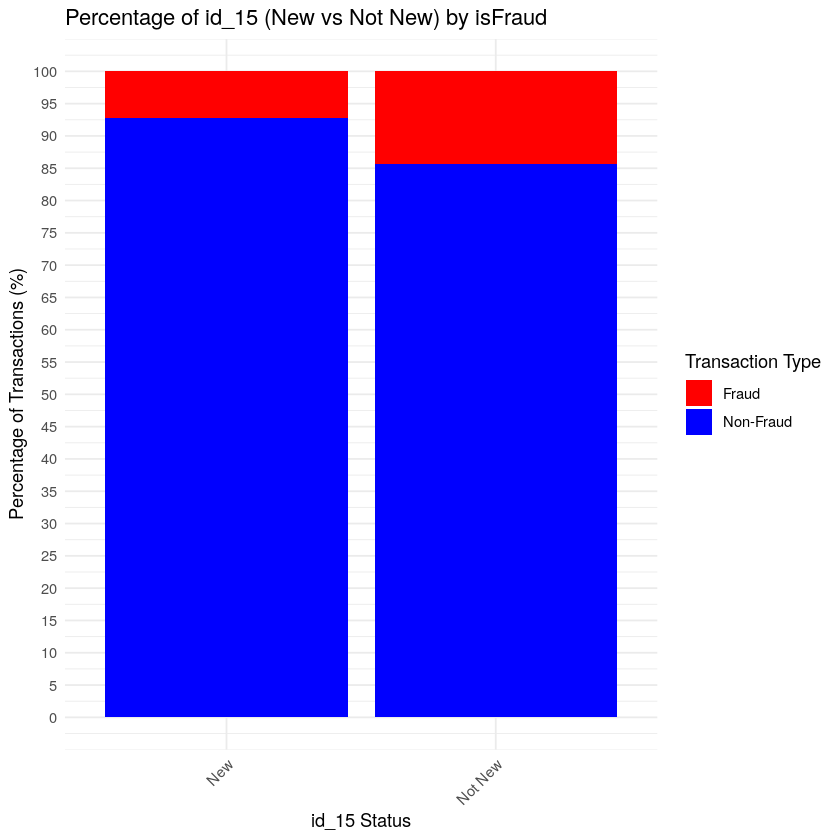

In [120]:
# view the percentage of id_15 group by isFraud and New and Not New------------------------------------------------
data <- data %>%
  mutate(id_15_status = case_when(
    id_15 == "New" ~ "New",
    TRUE ~ "Not New"
  ))
id_15_status_fraud_percentage <- data %>%
  group_by(id_15_status) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_15_status_fraud_percentage)
# visualize the percentage of id_15 group by isFraud and New and Not New------------------------------------------------
# First, reshape the data for better plotting
id_15_status_plot_data <- id_15_status_fraud_percentage %>%
  select(id_15_status, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type",
                values_to = "Percentage") %>%
    mutate(Type = case_when(
      Type == "FraudPercentage" ~ "Fraud",
      Type == "NonFraudPercentage" ~ "Non-Fraud"
    ))
# Create the plot with proper dodged bars
ggplot(id_15_status_plot_data, aes(x = id_15_status, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_15 (New vs Not New) by isFraud",
       x = "id_15 Status",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

       

# A tibble: 3 × 5
  id_28       FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 Empty Value        100          2103            4.54               95.5
2 Found             7833         45429           14.7                85.3
3 New               3385         41150            7.60               92.4


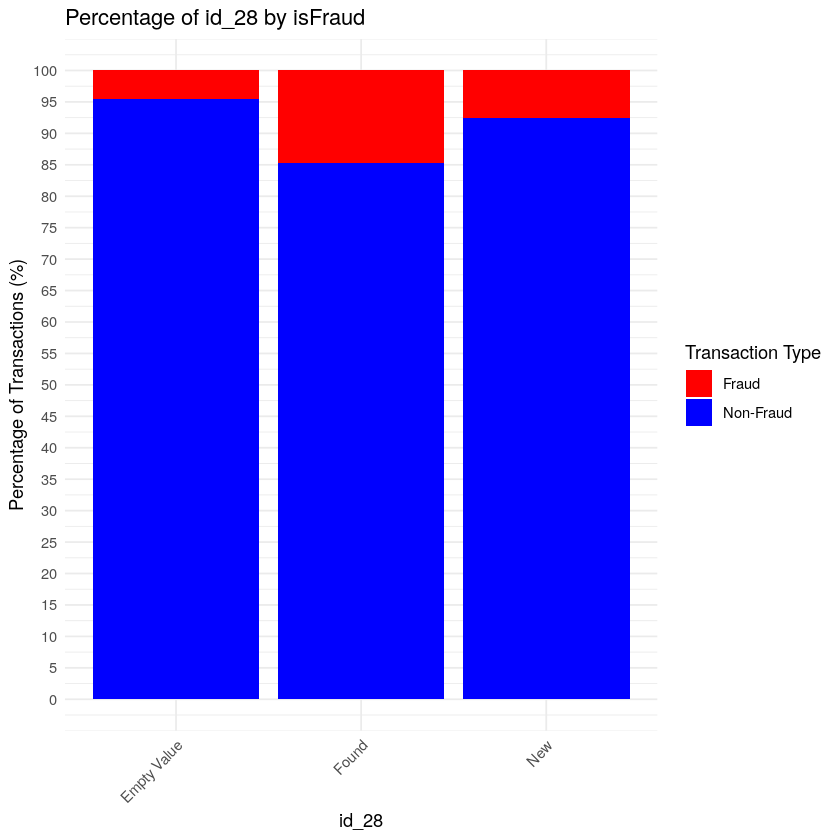

In [121]:
# view the percentage of id_28 group by isFraud ------------------------------------------------
id_28_fraud_percentage <- data %>%
  group_by(id_28) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_28_fraud_percentage)
# visualize the percentage of id_28 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
id_28_plot_data <- id_28_fraud_percentage %>%
  select(id_28, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(id_28_plot_data, aes(x = id_28, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_28 by isFraud",
       x = "id_28",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")


# A tibble: 3 × 5
  id_29       FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 Empty Value        100          2103            4.54               95.5
2 Found             7827         44567           14.9                85.1
3 NotFound          3391         42012            7.47               92.5


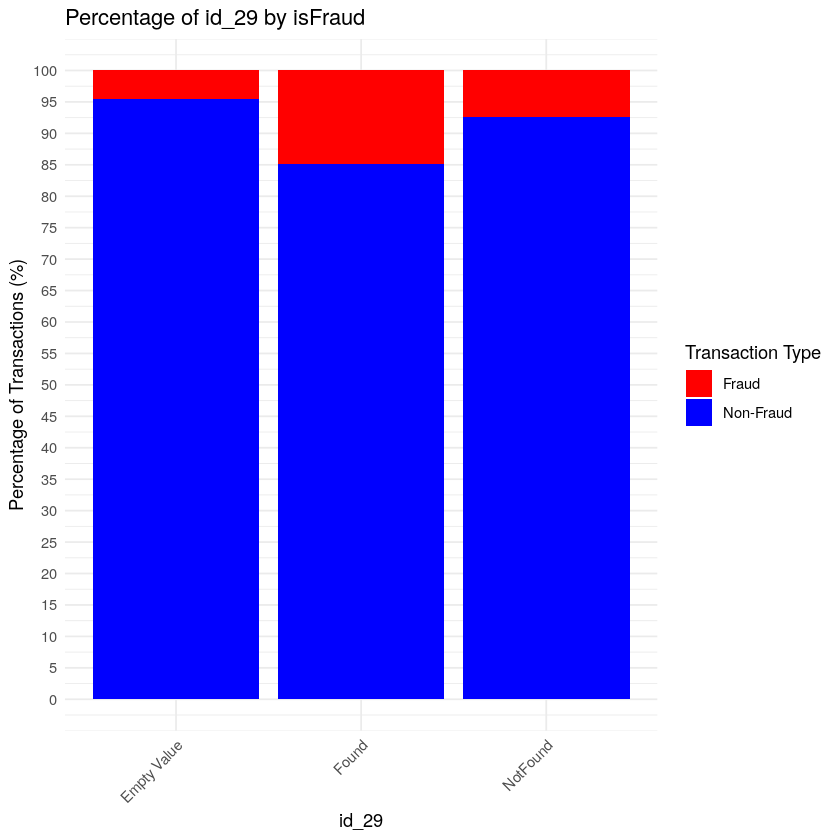

In [123]:
# view the percentage of id_29 group by isFraud ------------------------------------------------
id_29_fraud_percentage <- data %>%
  group_by(id_29) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_29_fraud_percentage)
# visualize the percentage of id_29 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
id_29_plot_data <- id_29_fraud_percentage %>%
  select(id_29, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(id_29_plot_data, aes(x = id_29, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_29 by isFraud",
       x = "id_29",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 8 × 5
  id_30       FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 Android            542          3828           12.4                87.6
2 Empty Value       7876         39318           16.7                83.3
3 Linux               85           675           11.2                88.8
4 Mac                298          8816            3.27               96.7
5 Windows           1268         23775            5.06               94.9
6 func                 0             8            0                 100  
7 iOS               1240         12260            9.19               90.8
8 other                9             2           81.8                18.2


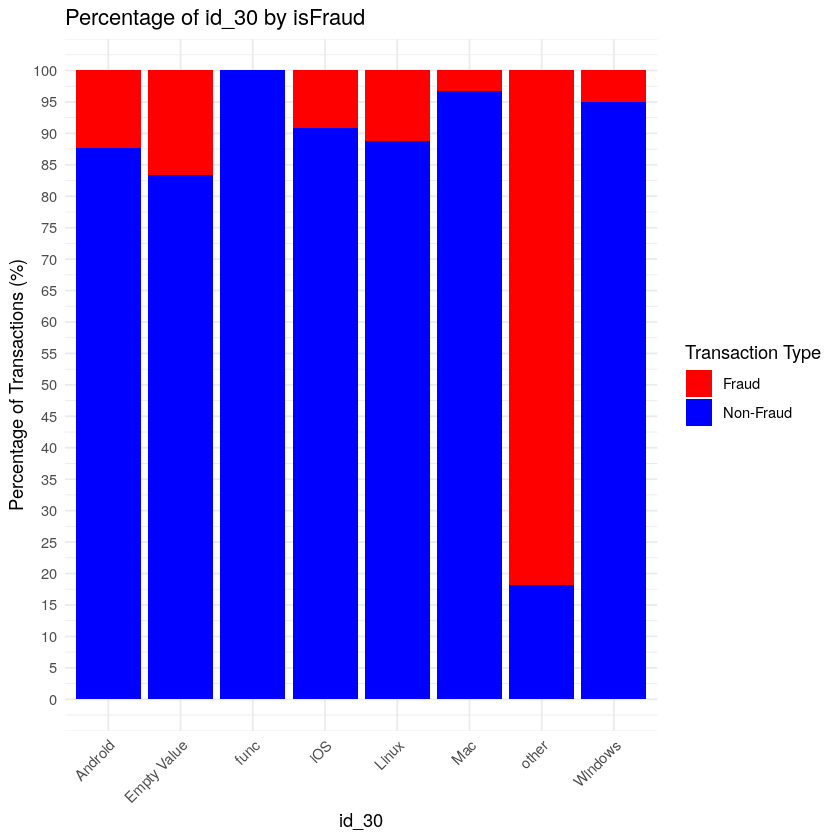

In [124]:
# view the percentage of id_30 group by isFraud ------------------------------------------------
id_30_fraud_percentage <- data %>%
  group_by(id_30) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_30_fraud_percentage)
# visualize the percentage of id_30 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
id_30_plot_data <- id_30_fraud_percentage %>%
  select(id_30, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(id_30_plot_data, aes(x = id_30, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_30 by isFraud",
       x = "id_30",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 5 × 5
  id_32 FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>      <int>         <int>           <dbl>              <dbl>
1 0              3             1           75                  25  
2 16            18            44           29.0                71.0
3 24          1800         34254            4.99               95.0
4 32          1630         15073            9.76               90.2
5 NA          7867         39310           16.7                83.3


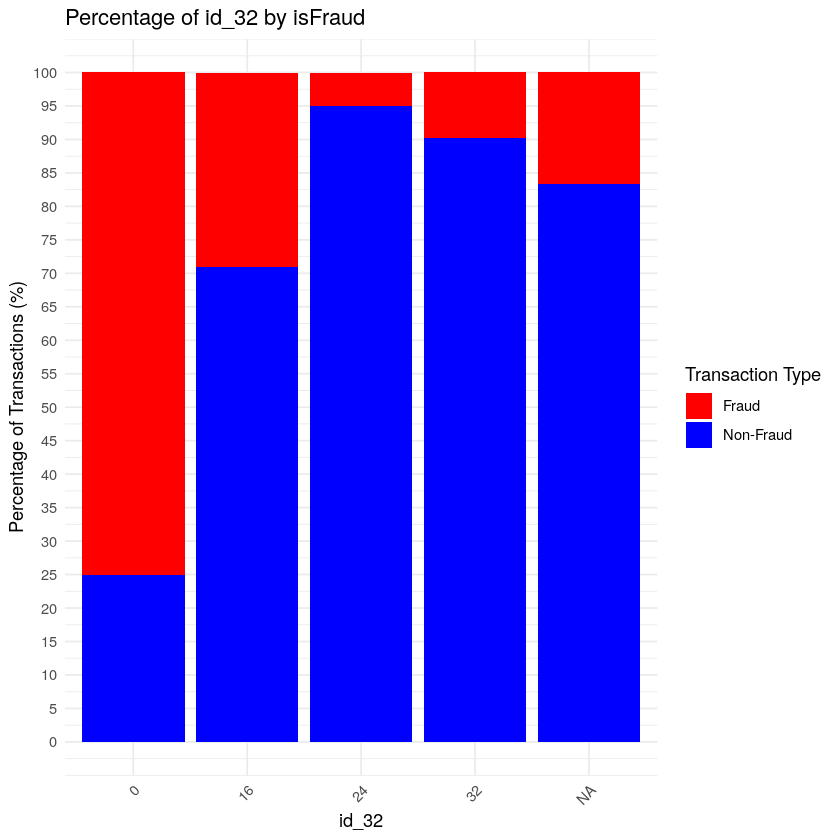

In [126]:
# Convert id_32 into string and view the percentage of id_32 group by isFraud ------------------------------------------------
data <- data %>% mutate(id_32 = as.character(id_32))
id_32_fraud_percentage <- data %>%
  group_by(id_32) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =  (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_32_fraud_percentage)
# visualize the percentage of id_32 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
id_32_plot_data <- id_32_fraud_percentage %>%
  select(id_32, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(id_32_plot_data, aes(x = id_32, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_32 by isFraud",
       x = "id_32",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")


# A tibble: 5 × 5
  id_34           FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>                <int>         <int>           <dbl>              <dbl>
1 Empty Value           7833         39168           16.7                83.3
2 match_status:-1          0             3            0                 100  
3 match_status:0          21           267            7.29               92.7
4 match_status:1        1106         10736            9.34               90.7
5 match_status:2        2358         38508            5.77               94.2


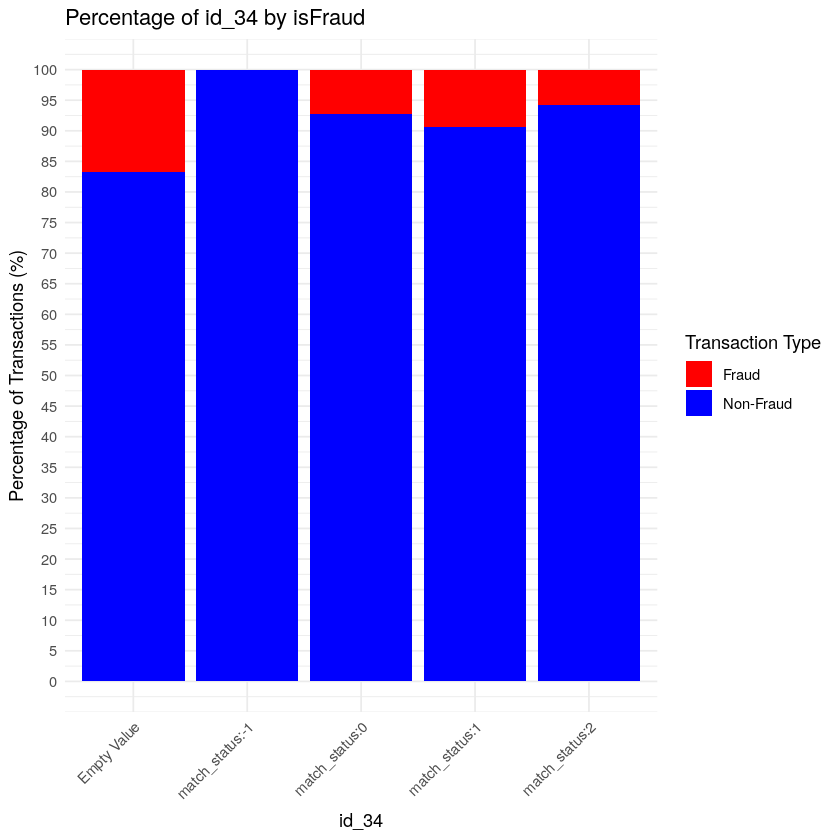

In [127]:
# view the percentage of id_34 group by isFraud ------------------------------------------------
id_34_fraud_percentage <- data %>%
  group_by(id_34) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_34_fraud_percentage)
# visualize the percentage of id_34 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
id_34_plot_data <- id_34_fraud_percentage %>%
  select(id_34, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(id_34_plot_data, aes(x = id_34, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_34 by isFraud",
       x = "id_34",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")       

# A tibble: 3 × 5
  id_35 FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <lgl>      <int>         <int>           <dbl>              <dbl>
1 FALSE       7745         37069           17.3                82.7
2 TRUE        3477         49513            6.56               93.4
3 NA            96          2100            4.37               95.6


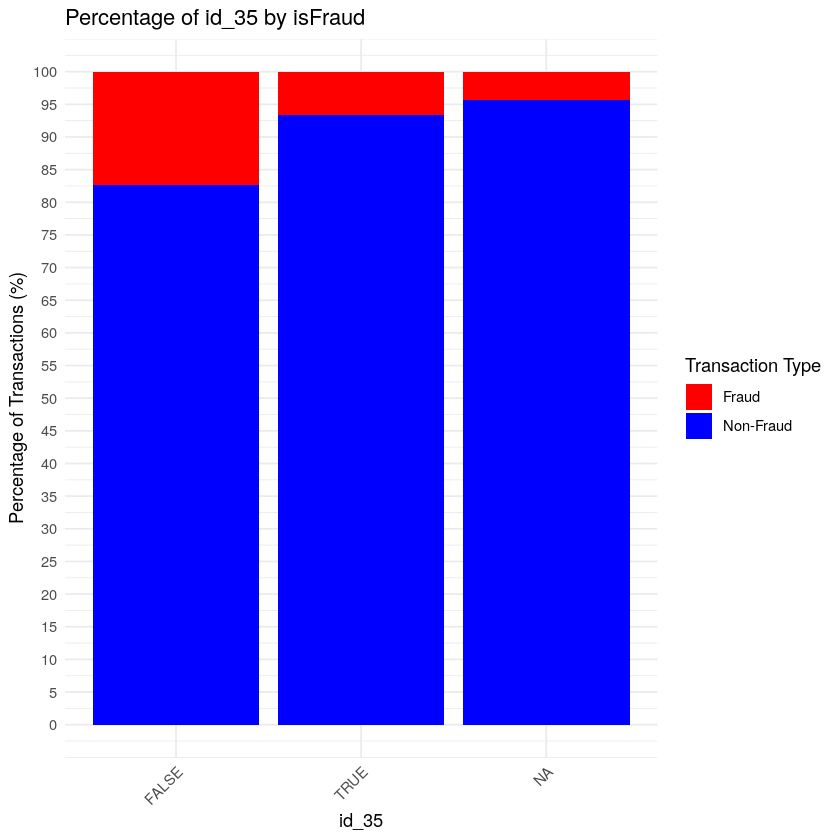

In [128]:
# view the percentage of id_35 group by isFraud ------------------------------------------------
id_35_fraud_percentage <- data %>%
  group_by(id_35) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_35_fraud_percentage)
# visualize the percentage of id_35 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
id_35_plot_data <- id_35_fraud_percentage %>%   
  select(id_35, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(id_35_plot_data, aes(x = id_35, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_35 by isFraud",
       x = "id_35",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")   

# A tibble: 3 × 5
  id_36 FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <lgl>      <int>         <int>           <dbl>              <dbl>
1 FALSE      10978         82096           11.8                88.2
2 TRUE         244          4486            5.16               94.8
3 NA            96          2100            4.37               95.6


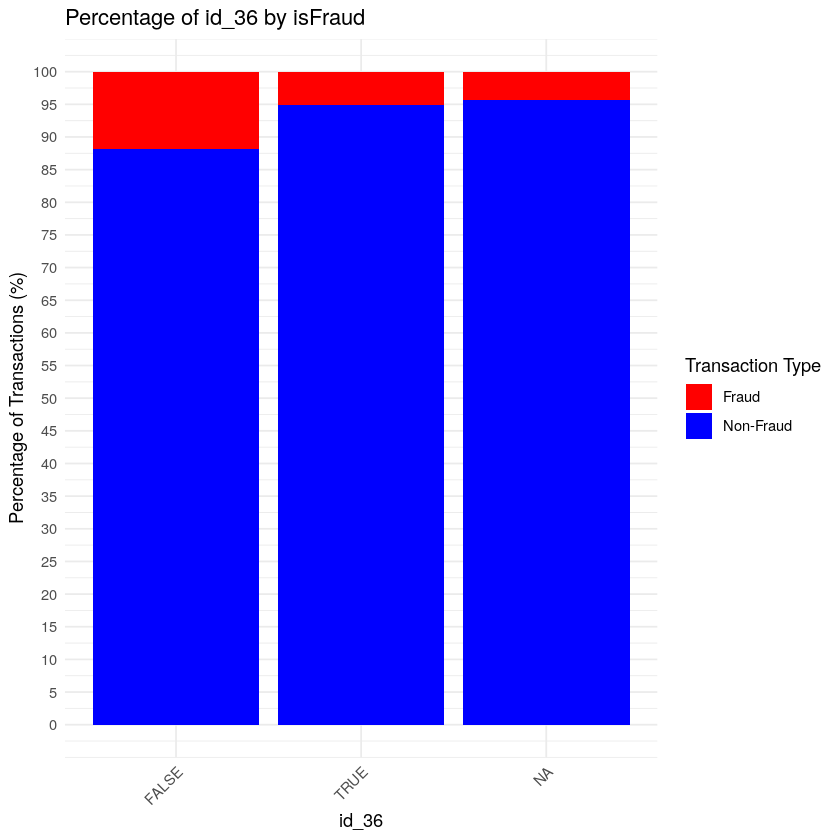

In [129]:
# view the percentage of id_36 group by isFraud ------------------------------------------------
id_36_fraud_percentage <- data %>%
  group_by(id_36) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_36_fraud_percentage)
# visualize the percentage of id_36 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
id_36_plot_data <- id_36_fraud_percentage %>%
  select(id_36, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(id_36_plot_data, aes(x = id_36, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_36 by isFraud",
       x = "id_36",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 3 × 5
  id_37 FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <lgl>      <int>         <int>           <dbl>              <dbl>
1 FALSE       2020         18944            9.64               90.4
2 TRUE        9202         67638           12.0                88.0
3 NA            96          2100            4.37               95.6


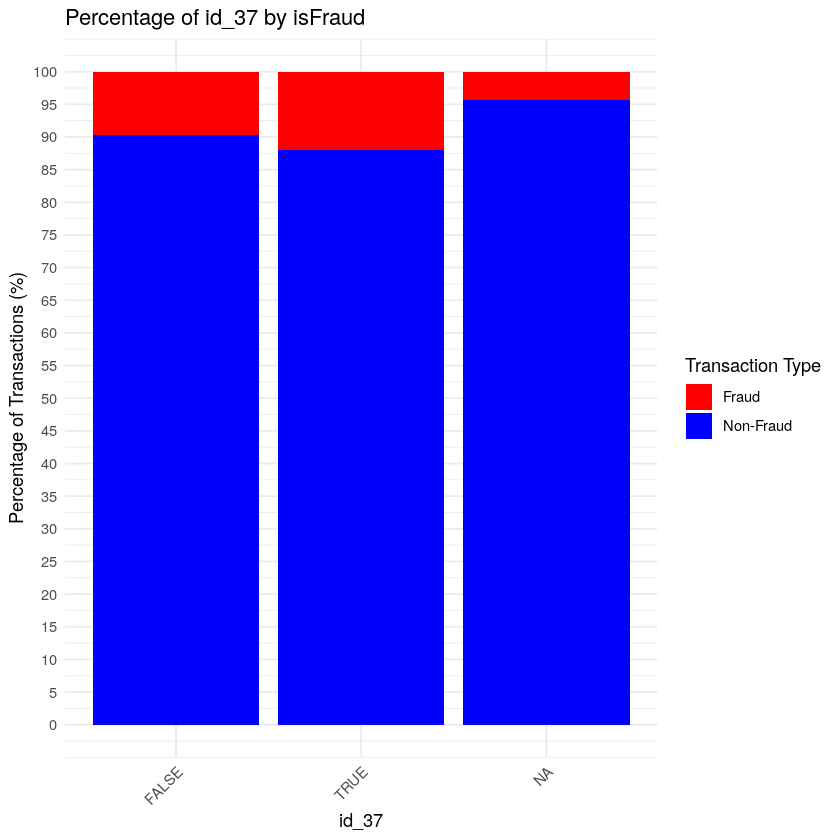

In [130]:
# view the percentage of id_37 group by isFraud ------------------------------------------------
id_37_fraud_percentage <- data %>%
  group_by(id_37) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_37_fraud_percentage)
# visualize the percentage of id_37 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
id_37_plot_data <- id_37_fraud_percentage %>%
  select(id_37, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(id_37_plot_data, aes(x = id_37, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_37 by isFraud",
       x = "id_37",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 3 × 5
  id_38 FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <lgl>      <int>         <int>           <dbl>              <dbl>
1 FALSE       7229         44511           14.0                86.0
2 TRUE        3993         42071            8.67               91.3
3 NA            96          2100            4.37               95.6


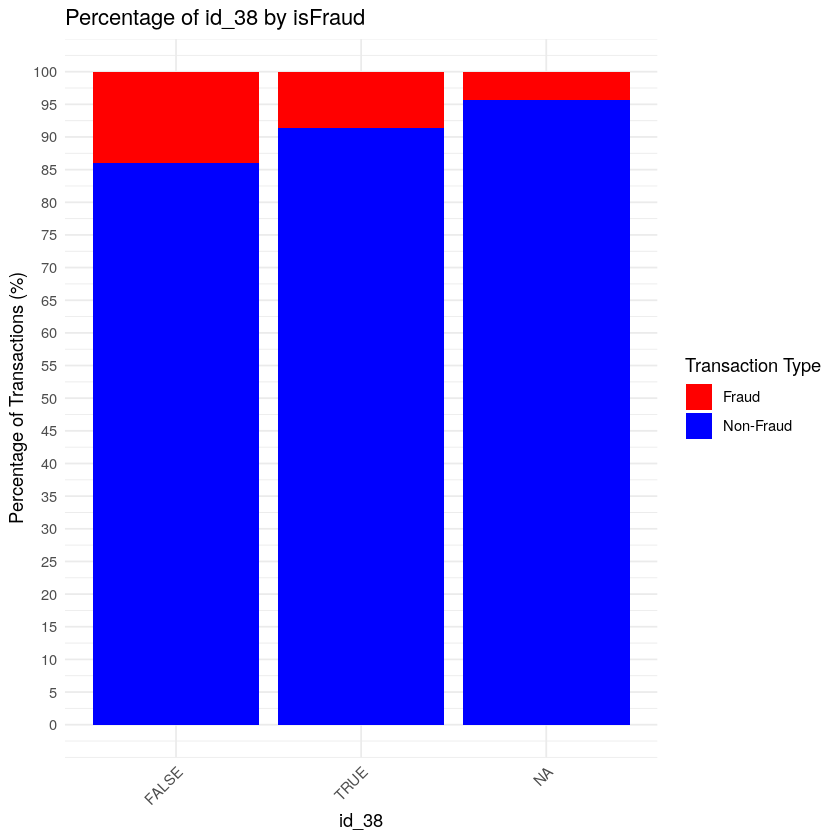

In [131]:
# view the percentage of id_38 group by isFraud ------------------------------------------------
id_38_fraud_percentage <- data %>%
  group_by(id_38) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id_38_fraud_percentage)
# visualize the percentage of id_38 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
id_38_plot_data <- id_38_fraud_percentage %>%  
  select(id_38, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))    
# Create the plot with proper dodged bars
ggplot(id_38_plot_data, aes(x = id_38, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of id_38 by isFraud",
       x = "id_38",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 2 × 5
  addr1_is_na FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 NA                7433         35448           17.3                82.7
2 Not NA            3885         53234            6.80               93.2


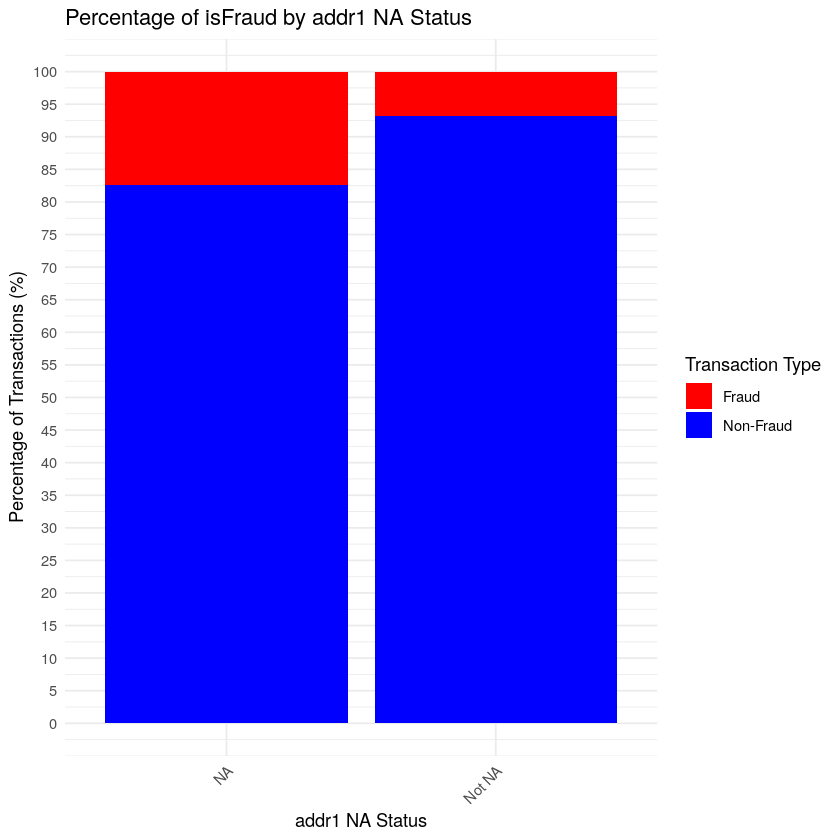

In [122]:
# view the percentage of isFraud by addr1 which is.na and not is.na ------------------------------------------------
addr1_fraud_summary <- data %>%
  mutate(addr1_is_na = ifelse(is.na(addr1), "NA", "Not NA")) %>%
  group_by(addr1_is_na) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(addr1_fraud_summary)

# visualize the percentage of isFraud by addr1 which is.na and not is.na ------------------------------------------------
# First, reshape the data for better plotting
addr1_plot_data <- addr1_fraud_summary %>%
  select(addr1_is_na, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(addr1_plot_data, aes(x = addr1_is_na, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of isFraud by addr1 NA Status",
       x = "addr1 NA Status",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")


In [51]:
# find the card1 with the record of isFraud == 1 ------------------------------------------------
fraudulent_card1 <- unique(data$card1[data$isFraud == 1])

# view the percentage of isFraud per card1 which is in fraudulent_card1 ------------------------------------------------
card1_fraud_percentage <- data %>%
  filter(card1 %in% fraudulent_card1) %>%
  group_by(card1) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100) %>%
  arrange(desc(FraudPercentage))

 # view the average percentage of isFraud per card1 which is in fraudulent_card1 ------------------------------------------------
card1_fraud_percentage <- card1_fraud_percentage %>%
  summarise(Average_FraudPercentage = mean(FraudPercentage),
            Average_NonFraudPercentage = mean(NonFraudPercentage))
print(card1_fraud_percentage)

# view the Average TxnAmt per TransactionMonth where card1 is in fraudulent_card1 and isFraud == 1 ------------------------------------------------
avg_txnamt_fraudulent_card1 <- data %>%
  filter(card1 %in% fraudulent_card1 & isFraud == 1) %>%
  group_by(TransactionMonth) %>%
  summarise(Average_TxnAmt = mean(TxnAmt, na.rm = TRUE))
print(avg_txnamt_fraudulent_card1)


# view the Average TxnAmt per TransactionMonth where card1 is in fraudulent_card1 and isFraud == 1 ------------------------------------------------
avg_txnamt_fraudulent_card1 <- data %>%
  filter(card1 %in% fraudulent_card1 & isFraud == 0) %>%
  group_by(TransactionMonth) %>%
  summarise(Average_TxnAmt = mean(TxnAmt, na.rm = TRUE))
print(avg_txnamt_fraudulent_card1)

# A tibble: 1 × 2
  Average_FraudPercentage Average_NonFraudPercentage
                    <dbl>                      <dbl>
1                    40.4                       59.6
# A tibble: 7 × 2
  TransactionMonth Average_TxnAmt
             <dbl>          <dbl>
1                1           165.
2                2           165.
3                3           144.
4                4           135.
5                5           140.
6                6           135.
7                7           138.
# A tibble: 7 × 2
  TransactionMonth Average_TxnAmt
             <dbl>          <dbl>
1                1           157.
2                2           109.
3                3           101.
4                4           102.
5                5           108.
6                6           120.
7                7           136.


Available C1-C14 columns:
 [1] "C1"  "C2"  "C3"  "C4"  "C5"  "C6"  "C7"  "C8"  "C9"  "C10" "C11" "C12"
[13] "C13" "C14"



Numeric C1-C14 columns:
 [1] "C1"  "C2"  "C3"  "C4"  "C5"  "C6"  "C7"  "C8"  "C9"  "C10" "C11" "C12"
[13] "C13" "C14"


Warning message in cor(., use = "complete.obs"):
“the standard deviation is zero”



Correlations between C1-C14 and isFraud:
     C1      C2      C3      C4      C5      C6      C7      C8      C9     C10 
 0.0397  0.0466 -0.0295  0.0265      NA  0.0265  0.0286  0.0319      NA  0.0253 
    C11     C12     C13     C14 
 0.0337  0.0346  0.0150  0.0164 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


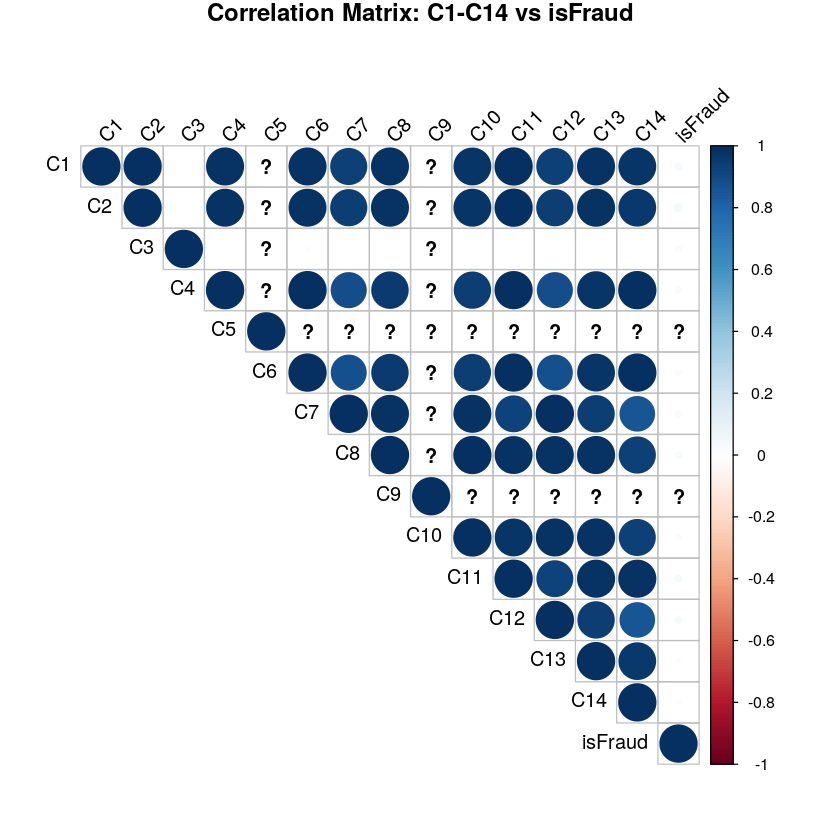


=== CORRELATION INTERPRETATION ===

STRONG POSITIVE CORRELATIONS (≥0.3):
• NA: NA - Higher values strongly associated with fraud
• NA: NA - Higher values strongly associated with fraud

MODERATE POSITIVE CORRELATIONS (0.1-0.3):
• NA: NA - Higher values moderately associated with fraud
• NA: NA - Higher values moderately associated with fraud

STRONG NEGATIVE CORRELATIONS (≤-0.3):
• NA: NA - Higher values strongly associated with legitimate transactions
• NA: NA - Higher values strongly associated with legitimate transactions

MODERATE NEGATIVE CORRELATIONS (-0.3 to -0.1):
• NA: NA - Higher values moderately associated with legitimate transactions
• NA: NA - Higher values moderately associated with legitimate transactions

MOST IMPORTANT VARIABLE: C2 (correlation: 0.0466)

SUMMARY:
• Variables with positive correlation: NA
• Variables with negative correlation: NA
• Average absolute correlation: NA

FEATURE IMPORTANCE RANKING (by absolute correlation):
1. C2: 0.0466
2. C1: 0.0397
3. C1

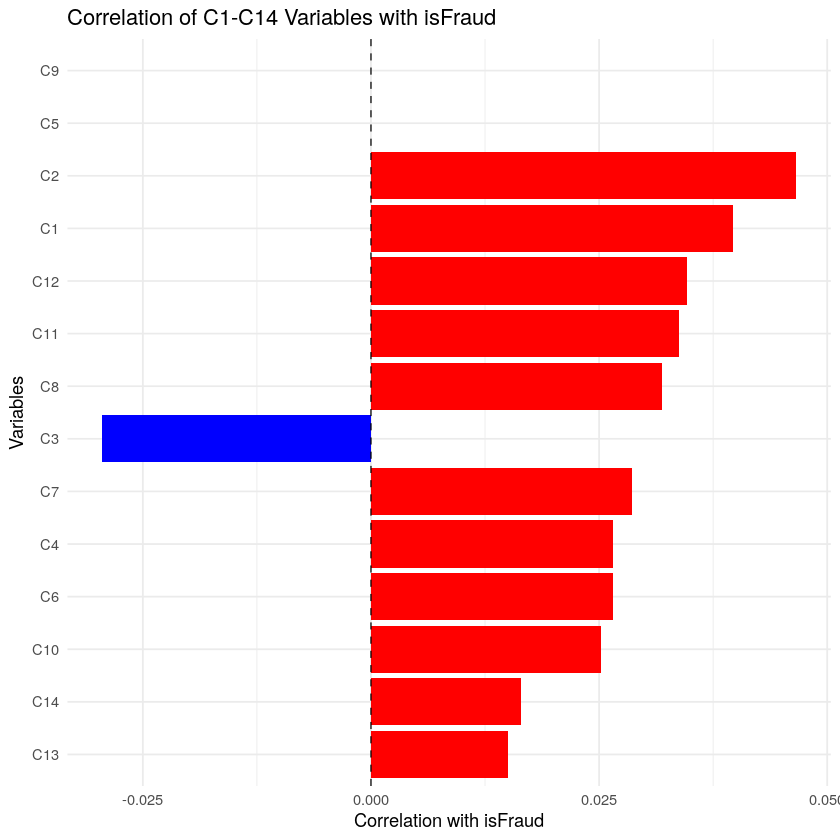

In [52]:
# view the correlation matrix between column from C1 to C14 vs isFraud ------------------------------------------------
# First, identify C1-C14 columns that exist and are numeric
c_column_names <- paste0("C", 1:14)
existing_d_columns <- intersect(c_column_names, names(data))

# Filter to only numeric C columns
numeric_c_columns <- data %>% 
  select(all_of(existing_d_columns)) %>%
  select_if(is.numeric) %>%
  names()

cat("Available C1-C14 columns:\n")
print(existing_d_columns)
cat("\nNumeric C1-C14 columns:\n")
print(numeric_c_columns)

# Calculate correlations only if we have numeric C columns
if(length(numeric_c_columns) > 0) {
  # Calculate correlation between each C column and isFraud
  correlations_with_fraud <- data %>%
    select(all_of(numeric_c_columns), isFraud) %>%
    cor(use = "complete.obs")
  
  # Extract only the correlations with isFraud (last row/column)
  fraud_correlations <- correlations_with_fraud[numeric_c_columns, "isFraud"]
  
  # Display correlations
  cat("\nCorrelations between C1-C14 and isFraud:\n")
  print(round(fraud_correlations, 4))
  
  # Create correlation plot
  corrplot(correlations_with_fraud, method = "circle", type = "upper", 
           tl.col = "black", tl.srt = 45, 
           title = "Correlation Matrix: C1-C14 vs isFraud", 
           mar = c(0,0,1,0))
  
  # Create a bar plot showing correlations with isFraud
  fraud_corr_df <- data.frame(
    Variable = names(fraud_correlations),
    Correlation = as.numeric(fraud_correlations)
  )
  
  library(ggplot2)
  ggplot(fraud_corr_df, aes(x = reorder(Variable, abs(Correlation)), y = Correlation)) +
    geom_bar(stat = "identity", fill = ifelse(fraud_corr_df$Correlation > 0, "red", "blue")) +
    coord_flip() +
    labs(title = "Correlation of C1-C14 Variables with isFraud",
         x = "Variables",
         y = "Correlation with isFraud") +
    theme_minimal() +
    geom_hline(yintercept = 0, linetype = "dashed", alpha = 0.7)
  
} else {
  cat("No numeric C1-C14 columns found in the dataset.\n")
  cat("Available columns:\n")
  print(names(data))
}

# Add interpretation after your correlation analysis
if(length(numeric_c_columns) > 0) {
  # ... existing correlation code ...
  
  # Interpret correlation results
  cat("\n=== CORRELATION INTERPRETATION ===\n")
  
  # Classify correlations by strength
  strong_positive <- fraud_correlations[fraud_correlations >= 0.3]
  moderate_positive <- fraud_correlations[fraud_correlations >= 0.1 & fraud_correlations < 0.3]
  weak_positive <- fraud_correlations[fraud_correlations > 0 & fraud_correlations < 0.1]
  
  strong_negative <- fraud_correlations[fraud_correlations <= -0.3]
  moderate_negative <- fraud_correlations[fraud_correlations <= -0.1 & fraud_correlations > -0.3]
  weak_negative <- fraud_correlations[fraud_correlations < 0 & fraud_correlations > -0.1]
  
  # Display interpretations
  if(length(strong_positive) > 0) {
    cat("\nSTRONG POSITIVE CORRELATIONS (≥0.3):\n")
    for(var in names(strong_positive)) {
      cat(sprintf("• %s: %.4f - Higher values strongly associated with fraud\n", 
                  var, strong_positive[var]))
    }
  }
  
  if(length(moderate_positive) > 0) {
    cat("\nMODERATE POSITIVE CORRELATIONS (0.1-0.3):\n")
    for(var in names(moderate_positive)) {
      cat(sprintf("• %s: %.4f - Higher values moderately associated with fraud\n", 
                  var, moderate_positive[var]))
    }
  }
  
  if(length(strong_negative) > 0) {
    cat("\nSTRONG NEGATIVE CORRELATIONS (≤-0.3):\n")
    for(var in names(strong_negative)) {
      cat(sprintf("• %s: %.4f - Higher values strongly associated with legitimate transactions\n", 
                  var, strong_negative[var]))
    }
  }
  
  if(length(moderate_negative) > 0) {
    cat("\nMODERATE NEGATIVE CORRELATIONS (-0.3 to -0.1):\n")
    for(var in names(moderate_negative)) {
      cat(sprintf("• %s: %.4f - Higher values moderately associated with legitimate transactions\n", 
                  var, moderate_negative[var]))
    }
  }
  
  # Find most important variables
  most_correlated <- names(fraud_correlations)[which.max(abs(fraud_correlations))]
  cat(sprintf("\nMOST IMPORTANT VARIABLE: %s (correlation: %.4f)\n", 
              most_correlated, fraud_correlations[most_correlated]))
  
  # Summary statistics
  cat(sprintf("\nSUMMARY:\n"))
  cat(sprintf("• Variables with positive correlation: %d\n", 
              sum(fraud_correlations > 0)))
  cat(sprintf("• Variables with negative correlation: %d\n", 
              sum(fraud_correlations < 0)))
  cat(sprintf("• Average absolute correlation: %.4f\n", 
              mean(abs(fraud_correlations))))
  
  # Feature importance ranking
  importance_ranking <- sort(abs(fraud_correlations), decreasing = TRUE)
  cat("\nFEATURE IMPORTANCE RANKING (by absolute correlation):\n")
  for(i in 1:min(5, length(importance_ranking))) {
    var_name <- names(importance_ranking)[i]
    cat(sprintf("%d. %s: %.4f\n", i, var_name, fraud_correlations[var_name]))
  }
}

Warning message in cor(., use = "complete.obs"):
“the standard deviation is zero”



Correlations between C1-C14 and isFraud:
     C1      C2      C3      C4      C5      C6      C7      C8      C9     C10 
 0.0397  0.0466 -0.0295  0.0265      NA  0.0265  0.0286  0.0319      NA  0.0253 
    C11     C12     C13     C14 
 0.0337  0.0346  0.0150  0.0164 


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


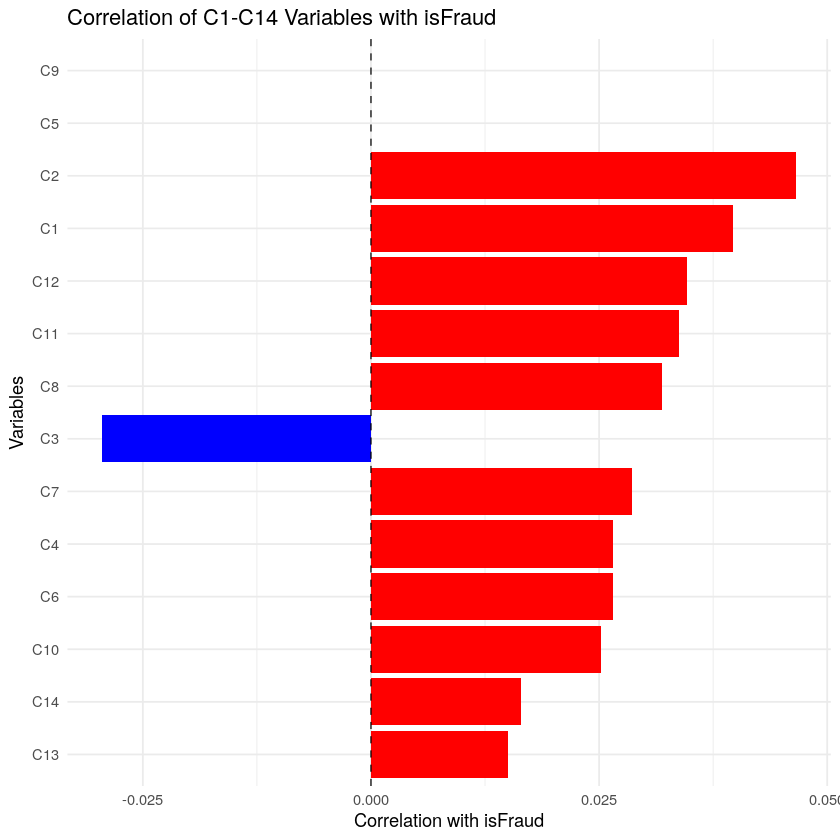

In [53]:
# view the correlation matrix between column from C1 to C14 vs isFraud ------------------------------------------------
numeric_c_columns <- paste0("C", 1:14)


  # Calculate correlation between each C column and isFraud
  correlations_with_fraud <- data %>%
    select(all_of(numeric_c_columns), isFraud) %>%
    cor(use = "complete.obs")
  
  # Extract only the correlations with isFraud (last row/column)
  fraud_correlations <- correlations_with_fraud[numeric_c_columns, "isFraud"]
  
  # Display correlations
  cat("\nCorrelations between C1-C14 and isFraud:\n")
  print(round(fraud_correlations, 4))
  

  ggplot(fraud_corr_df, aes(x = reorder(Variable, abs(Correlation)), y = Correlation)) +
    geom_bar(stat = "identity", fill = ifelse(fraud_corr_df$Correlation > 0, "red", "blue")) +
    coord_flip() +
    labs(title = "Correlation of C1-C14 Variables with isFraud",
         x = "Variables",
         y = "Correlation with isFraud") +
    theme_minimal() +
    geom_hline(yintercept = 0, linetype = "dashed", alpha = 0.7)
  


# A tibble: 2 × 5
  id_12    FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>         <int>         <int>           <dbl>              <dbl>
1 Found          1269         13176            8.79               91.2
2 NotFound      10049         75506           11.7                88.3


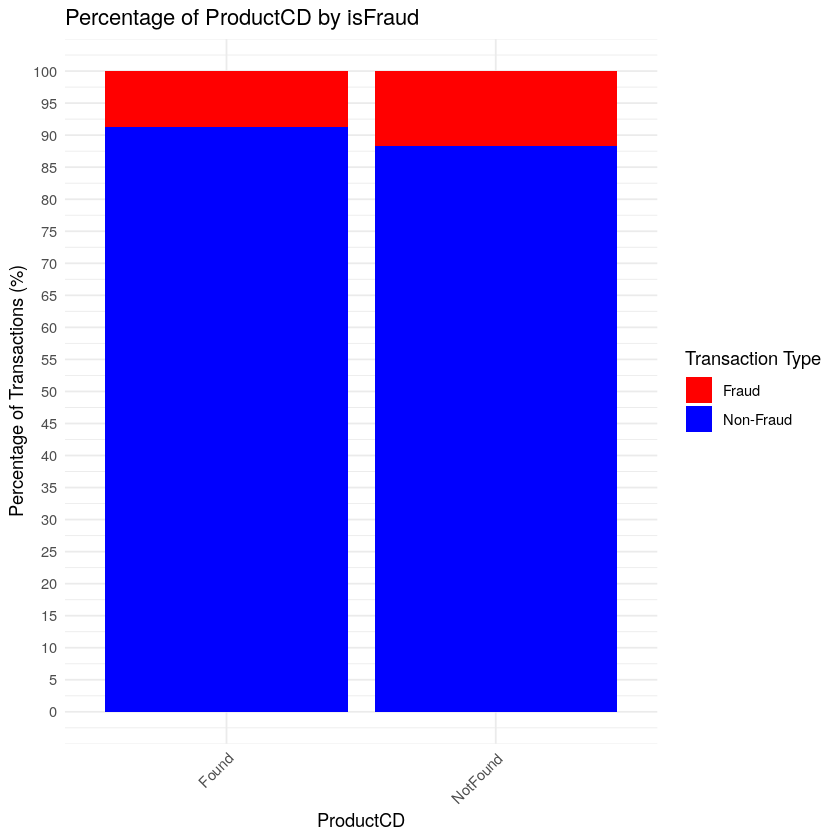

In [54]:
# view the percentage of id12 group by isFraud ------------------------------------------------
id12_fraud_percentage <- data %>%
  group_by(id_12) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(id12_fraud_percentage)

# visualize the percentage of id12 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
id12_plot_data <- id12_fraud_percentage %>%
  select(id_12, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(id12_plot_data, aes(x = id_12, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of ProductCD by isFraud",
       x = "ProductCD",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")   

Available C1-C14 columns:
[1] "D1"  "D8"  "D9"  "D11"

Numeric C1-C14 columns:
[1] "D1" "D8" "D9"



Correlations between D1-D15 and isFraud:
     D1      D8      D9 
-0.0747 -0.1687 -0.0502 


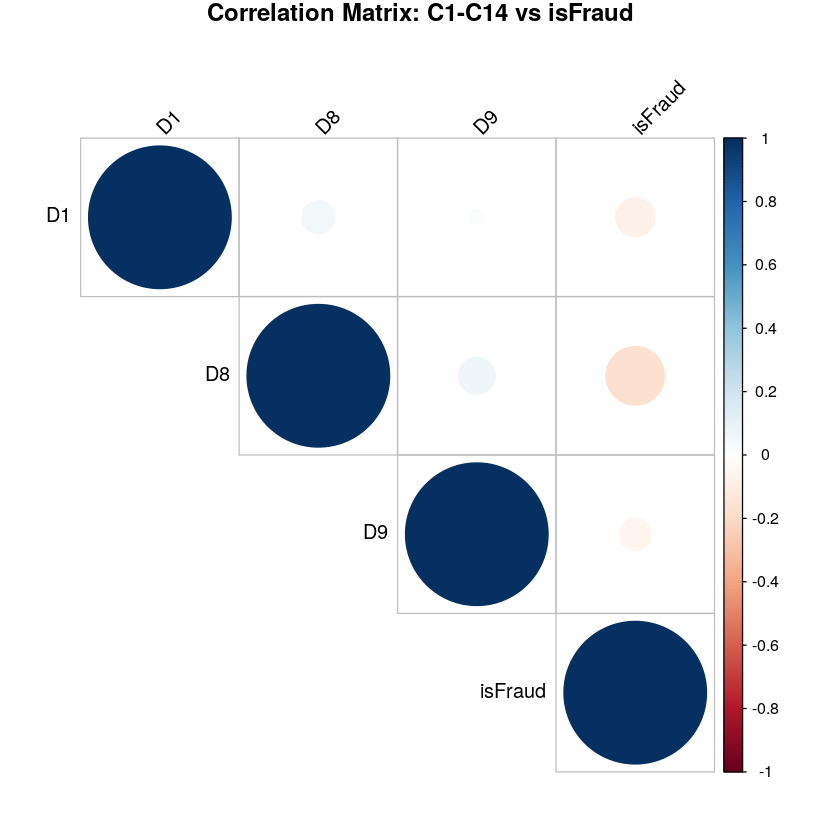


=== CORRELATION INTERPRETATION ===

MODERATE NEGATIVE CORRELATIONS (-0.3 to -0.1):
• D8: -0.1687 - Higher values moderately associated with legitimate transactions

MOST IMPORTANT VARIABLE: D8 (correlation: -0.1687)

SUMMARY:
• Variables with positive correlation: 0
• Variables with negative correlation: 3
• Average absolute correlation: 0.0979

FEATURE IMPORTANCE RANKING (by absolute correlation):
1. D8: -0.1687
2. D1: -0.0747
3. D9: -0.0502


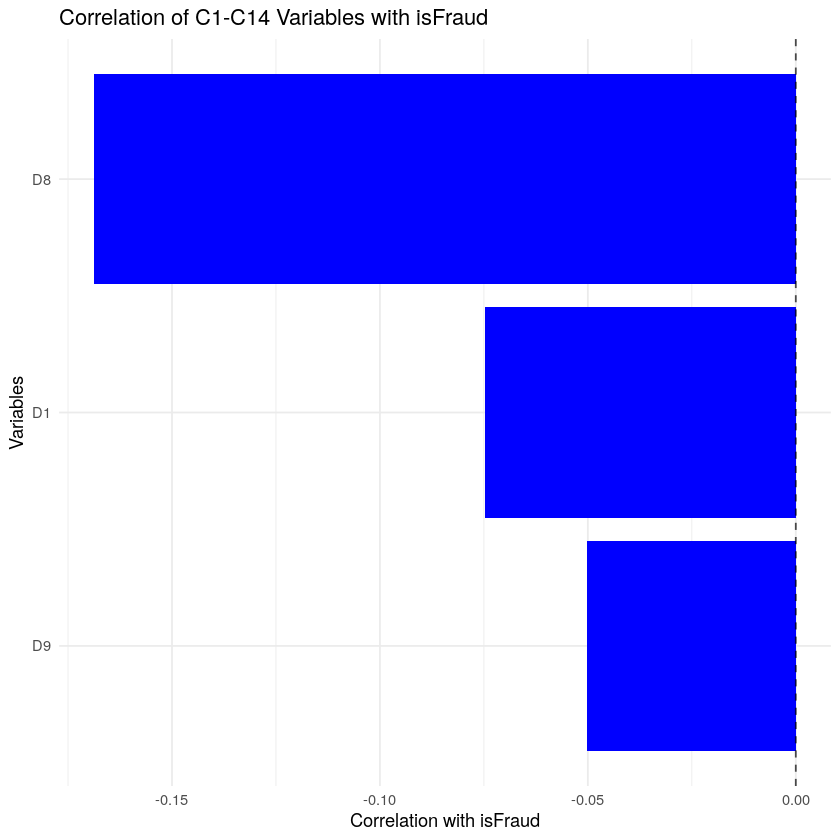

In [55]:
# view the correlation matrix between column from D1 to D15 vs isFraud ------------------------------------------------
# First, identify D1-D15 columns that exist and are numeric
d_column_names <- paste0("D", 1:15)
existing_d_columns <- intersect(d_column_names, names(data))

# Filter to only numeric C columns
numeric_d_columns <- data %>% 
  select(all_of(existing_d_columns)) %>%
  select_if(is.numeric) %>%
  names()

cat("Available C1-C14 columns:\n")
print(existing_d_columns)
cat("\nNumeric C1-C14 columns:\n")
print(numeric_d_columns)

# Calculate correlations only if we have numeric C columns
if(length(numeric_d_columns) > 0) {
  # Calculate correlation between each C column and isFraud
  correlations_with_fraud <- data %>%
    select(all_of(numeric_d_columns), isFraud) %>%
    cor(use = "complete.obs")
  
  # Extract only the correlations with isFraud (last row/column)
  fraud_correlations <- correlations_with_fraud[numeric_d_columns, "isFraud"]
  
  # Display correlations
  cat("\nCorrelations between D1-D15 and isFraud:\n")
  print(round(fraud_correlations, 4))
  
  # Create correlation plot
  corrplot(correlations_with_fraud, method = "circle", type = "upper", 
           tl.col = "black", tl.srt = 45, 
           title = "Correlation Matrix: C1-C14 vs isFraud", 
           mar = c(0,0,1,0))
  
  # Create a bar plot showing correlations with isFraud
  fraud_corr_df <- data.frame(
    Variable = names(fraud_correlations),
    Correlation = as.numeric(fraud_correlations)
  )
  
  library(ggplot2)
  ggplot(fraud_corr_df, aes(x = reorder(Variable, abs(Correlation)), y = Correlation)) +
    geom_bar(stat = "identity", fill = ifelse(fraud_corr_df$Correlation > 0, "red", "blue")) +
    coord_flip() +
    labs(title = "Correlation of C1-C14 Variables with isFraud",
         x = "Variables",
         y = "Correlation with isFraud") +
    theme_minimal() +
    geom_hline(yintercept = 0, linetype = "dashed", alpha = 0.7)
  
} else {
  cat("No numeric C1-C14 columns found in the dataset.\n")
  cat("Available columns:\n")
  print(names(data))
}

# Add interpretation after your correlation analysis
if(length(numeric_d_columns) > 0) {
  # ... existing correlation code ...
  
  # Interpret correlation results
  cat("\n=== CORRELATION INTERPRETATION ===\n")
  
  # Classify correlations by strength
  strong_positive <- fraud_correlations[fraud_correlations >= 0.3]
  moderate_positive <- fraud_correlations[fraud_correlations >= 0.1 & fraud_correlations < 0.3]
  weak_positive <- fraud_correlations[fraud_correlations > 0 & fraud_correlations < 0.1]
  
  strong_negative <- fraud_correlations[fraud_correlations <= -0.3]
  moderate_negative <- fraud_correlations[fraud_correlations <= -0.1 & fraud_correlations > -0.3]
  weak_negative <- fraud_correlations[fraud_correlations < 0 & fraud_correlations > -0.1]
  
  # Display interpretations
  if(length(strong_positive) > 0) {
    cat("\nSTRONG POSITIVE CORRELATIONS (≥0.3):\n")
    for(var in names(strong_positive)) {
      cat(sprintf("• %s: %.4f - Higher values strongly associated with fraud\n", 
                  var, strong_positive[var]))
    }
  }
  
  if(length(moderate_positive) > 0) {
    cat("\nMODERATE POSITIVE CORRELATIONS (0.1-0.3):\n")
    for(var in names(moderate_positive)) {
      cat(sprintf("• %s: %.4f - Higher values moderately associated with fraud\n", 
                  var, moderate_positive[var]))
    }
  }
  
  if(length(strong_negative) > 0) {
    cat("\nSTRONG NEGATIVE CORRELATIONS (≤-0.3):\n")
    for(var in names(strong_negative)) {
      cat(sprintf("• %s: %.4f - Higher values strongly associated with legitimate transactions\n", 
                  var, strong_negative[var]))
    }
  }
  
  if(length(moderate_negative) > 0) {
    cat("\nMODERATE NEGATIVE CORRELATIONS (-0.3 to -0.1):\n")
    for(var in names(moderate_negative)) {
      cat(sprintf("• %s: %.4f - Higher values moderately associated with legitimate transactions\n", 
                  var, moderate_negative[var]))
    }
  }
  
  # Find most important variables
  most_correlated <- names(fraud_correlations)[which.max(abs(fraud_correlations))]
  cat(sprintf("\nMOST IMPORTANT VARIABLE: %s (correlation: %.4f)\n", 
              most_correlated, fraud_correlations[most_correlated]))
  
  # Summary statistics
  cat(sprintf("\nSUMMARY:\n"))
  cat(sprintf("• Variables with positive correlation: %d\n", 
              sum(fraud_correlations > 0)))
  cat(sprintf("• Variables with negative correlation: %d\n", 
              sum(fraud_correlations < 0)))
  cat(sprintf("• Average absolute correlation: %.4f\n", 
              mean(abs(fraud_correlations))))
  
  # Feature importance ranking
  importance_ranking <- sort(abs(fraud_correlations), decreasing = TRUE)
  cat("\nFEATURE IMPORTANCE RANKING (by absolute correlation):\n")
  for(i in 1:min(5, length(importance_ranking))) {
    var_name <- names(importance_ranking)[i]
    cat(sprintf("%d. %s: %.4f\n", i, var_name, fraud_correlations[var_name]))
  }
}


Correlations between D1, D8, D9, D11 and isFraud:
     D1      D8      D9 
-0.0747 -0.1687 -0.0502 


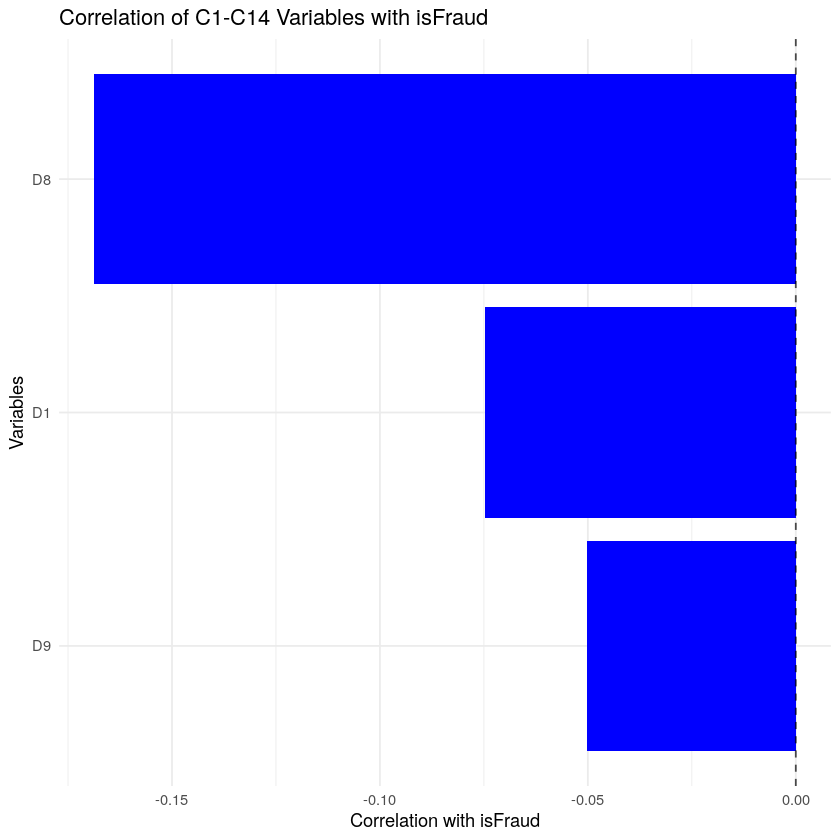

In [63]:
# view the correlation matrix between column from D1 to D15 vs isFraud ------------------------------------------------
d_column_names <- paste0("D", c(1,8,9,11))


# Filter to only numeric D columns
numeric_d_columns <- data %>% 
  select(all_of(d_column_names)) %>%
  select_if(is.numeric) %>%
  names()



  # Calculate correlation between each C column and isFraud
  correlations_with_fraud <- data %>%
    select(all_of(numeric_d_columns), isFraud) %>%
    cor(use = "complete.obs")
  
  # Extract only the correlations with isFraud (last row/column)
  fraud_correlations <- correlations_with_fraud[numeric_d_columns, "isFraud"]
  
  # Display correlations
  cat("\nCorrelations between D1, D8, D9, D11 and isFraud:\n")
  print(round(fraud_correlations, 4))
  
 
  ggplot(fraud_corr_df, aes(x = reorder(Variable, abs(Correlation)), y = Correlation)) +
    geom_bar(stat = "identity", fill = ifelse(fraud_corr_df$Correlation > 0, "red", "blue")) +
    coord_flip() +
    labs(title = "Correlation of C1-C14 Variables with isFraud",
         x = "Variables",
         y = "Correlation with isFraud") +
    theme_minimal() +
    geom_hline(yintercept = 0, linetype = "dashed", alpha = 0.7)



Correlations between D columns and isFraud:
     D1      D8      D9 
-0.0747 -0.1687 -0.0502 


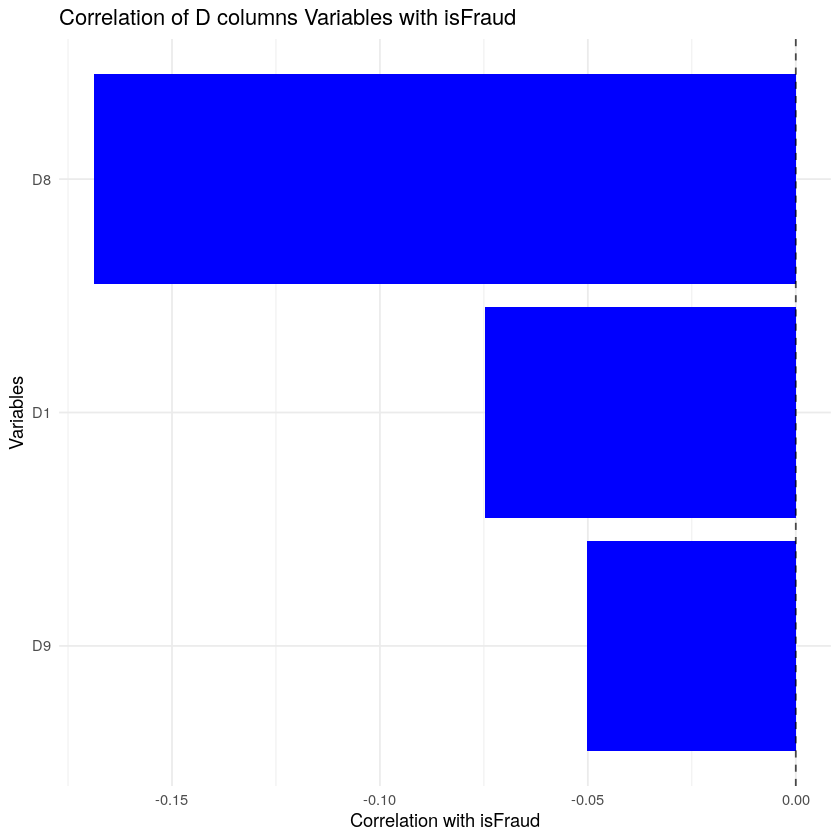

In [ ]:
# view the correlation matrix between column from D1 to D15 vs isFraud ------------------------------------------------
d_column_names <- paste0("D", c(1,8,9,11))


# Filter to only numeric D columns
numeric_d_columns <- data %>% 
  select(all_of(d_column_names)) %>%
  select_if(is.numeric) %>%
  names()

  # Calculate correlation between each C column and isFraud
  correlations_with_fraud <- data %>%
    select(all_of(numeric_d_columns), isFraud) %>%
    cor(use = "complete.obs")
  
  # Extract only the correlations with isFraud (last row/column)
  fraud_correlations <- correlations_with_fraud[numeric_d_columns, "isFraud"]
  
  # Display correlations
  cat("\nCorrelations between D columns and isFraud:\n")
  print(round(fraud_correlations, 4))
  
 
  ggplot(fraud_corr_df, aes(x = reorder(Variable, abs(Correlation)), y = Correlation)) +
    geom_bar(stat = "identity", fill = ifelse(fraud_corr_df$Correlation > 0, "red", "blue")) +
    coord_flip() +
    labs(title = "Correlation of D columns Variables with isFraud",
         x = "Variables",
         y = "Correlation with isFraud") +
    theme_minimal() +
    geom_hline(yintercept = 0, linetype = "dashed", alpha = 0.7)


Correlations between V Columns and isFraud:
   V310    V311    V312    V313    V314 
-0.0219 -0.0054 -0.0133 -0.0031 -0.0158 


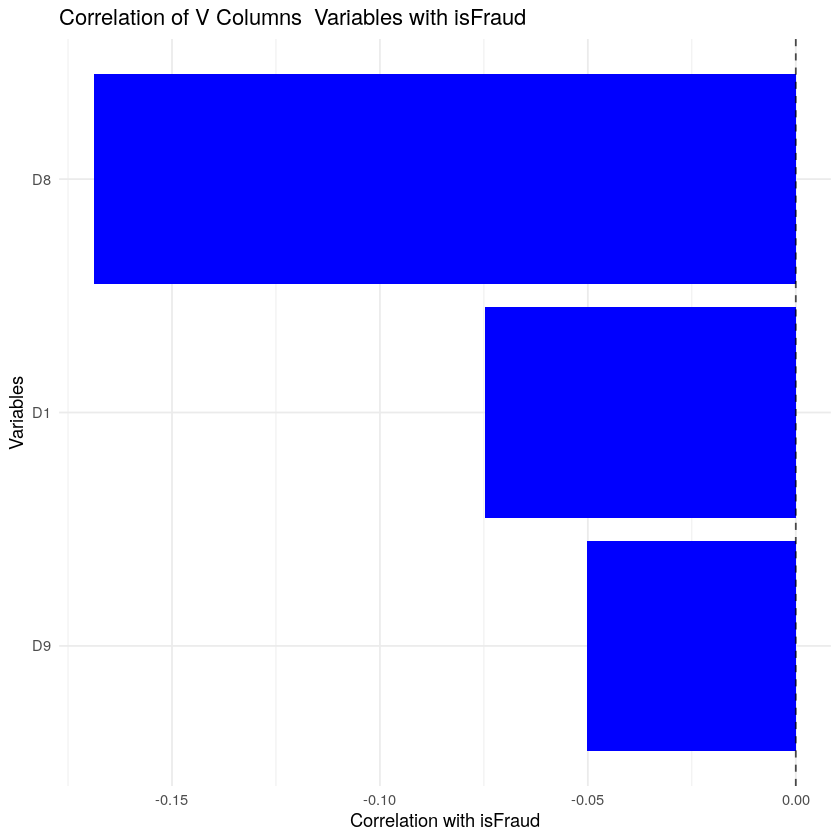

In [ ]:
# view the correlation matrix between column from V310 to V314 vs isFraud ------------------------------------------------
V_column_names <- paste0("V", 310:314)


# Filter to only numeric D columns
numeric_V_columns <- data %>% 
  select(all_of(V_column_names)) %>%
  select_if(is.numeric) %>%
  names()


  # Calculate correlation between each C column and isFraud
  correlations_with_fraud <- data %>%
    select(all_of(numeric_V_columns), isFraud) %>%
    cor(use = "complete.obs")
  
  # Extract only the correlations with isFraud (last row/column)
  fraud_correlations <- correlations_with_fraud[numeric_V_columns, "isFraud"]
  
  # Display correlations
  cat("\nCorrelations between V Columns and isFraud:\n")
  print(round(fraud_correlations, 4))
  
 
  ggplot(fraud_corr_df, aes(x = reorder(Variable, abs(Correlation)), y = Correlation)) +
    geom_bar(stat = "identity", fill = ifelse(fraud_corr_df$Correlation > 0, "red", "blue")) +
    coord_flip() +
    labs(title = "Correlation of V Columns Variables with isFraud",
         x = "Variables",
         y = "Correlation with isFraud") +
    theme_minimal() +
    geom_hline(yintercept = 0, linetype = "dashed", alpha = 0.7)